In [1]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

In [2]:
#importar el csv y imprimir las primeras 5 lineas
datos = pd.read_csv('movies.csv')

In [3]:
# data cleaning
datos.drop_duplicates(keep='first')
#drop id column
datos = datos.drop('id', 1) 
#convert castmen and cast women to int
datos['castWomenAmount'] = pd.to_numeric(datos['castWomenAmount'],errors='coerce')
datos['castMenAmount'] = pd.to_numeric(datos['castMenAmount'],errors='coerce')
#change releaseDate to datime format

datos['releaseDate'] = datos['releaseDate'].str.replace('-','/')
datos['releaseDate'] = pd.to_datetime(datos['releaseDate'], infer_datetime_format=True)

In [4]:
datos.head()

,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,Allison Anders|Alexandre Rockwell|Robert Rodri...,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15.0,9.0
1,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,Stephen Hopkins,...,9.596,1993-10-15,6.5,223,3,3,2,15,3.0,9.0
2,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,George Lucas,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5.0,62.0
3,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,Andrew Stanton,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5.0,18.0
4,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,Robert Zemeckis,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18.0,48.0


# Explicacion rapida de los datos

In [5]:
#informacion general sobre los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   budget                     10000 non-null  int64         
 1   genres                     9947 non-null   object        
 2   homePage                   4193 non-null   object        
 3   productionCompany          9543 non-null   object        
 4   productionCompanyCountry   8720 non-null   object        
 5   productionCountry          9767 non-null   object        
 6   revenue                    10000 non-null  float64       
 7   runtime                    10000 non-null  int64         
 8   video                      9514 non-null   object        
 9   director                   9926 non-null   object        
 10  actors                     9920 non-null   object        
 11  actorsPopularity           9913 non-null   object        
 12  actor

In [6]:
#distribicion de los datos en el csv
datos.nunique()

budget                        668
genres                       2345
homePage                     4125
productionCompany            8163
productionCompanyCountry     2354
productionCountry             879
revenue                      5084
runtime                       220
video                           2
director                     5330
actors                       9423
actorsPopularity             9855
actorsCharacter              9796
originalTitle                9760
title                        9697
originalLanguage               40
popularity                   8972
releaseDate                  5568
voteAvg                        76
voteCount                    3193
genresAmount                   11
productionCoAmount             29
productionCountriesAmount      40
actorsAmount                  202
castWomenAmount               185
castMenAmount                 450
dtype: int64

In [7]:
#informcacion sobre el tipo de datos
datos.dtypes

budget                                int64
genres                               object
homePage                             object
productionCompany                    object
productionCompanyCountry             object
productionCountry                    object
revenue                             float64
runtime                               int64
video                                object
director                             object
actors                               object
actorsPopularity                     object
actorsCharacter                      object
originalTitle                        object
title                                object
originalLanguage                     object
popularity                          float64
releaseDate                  datetime64[ns]
voteAvg                             float64
voteCount                             int64
genresAmount                          int64
productionCoAmount                    int64
productionCountriesAmount       

# Tipos de Variables

In [8]:
#distribucion variables categoricas
datos.describe(include=["O"]).transpose()

,count,unique,top,freq
genres,9947,2345,Drama,521
homePage,4193,4125,http://www.naruto-movie.com/,6
productionCompany,9543,8163,Paramount,55
productionCompanyCountry,8720,2354,US,997
productionCountry,9767,879,United States of America,4971
video,9514,2,False,9430
director,9926,5330,Steven Spielberg,29
actors,9920,9423,FALSE,480
actorsPopularity,9913,9855,0.6,16
actorsCharacter,9953,9796,||||,17


In [9]:
#distribucion variables numericas
datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,10000.0,1.855163e+07,3.662669e+07,0.000,0.00000,500000.0000,2.000000e+07,3.800000e+08
revenue,10000.0,5.673793e+07,1.495854e+08,0.000,0.00000,163124.5000,4.479661e+07,2.847246e+09
runtime,10000.0,1.002681e+02,2.777783e+01,0.000,90.00000,100.0000,1.130000e+02,7.500000e+02
popularity,10000.0,5.139391e+01,2.167296e+02,4.258,14.57775,21.9055,4.065400e+01,1.147465e+04
voteAvg,10000.0,6.483490e+00,9.842740e-01,1.300,5.90000,6.5000,7.200000e+00,1.000000e+01
voteCount,10000.0,1.342382e+03,2.564197e+03,1.000,120.00000,415.0000,1.316000e+03,3.078800e+04
genresAmount,10000.0,2.596500e+00,1.154565e+00,0.000,2.00000,3.0000,3.000000e+00,1.600000e+01
productionCoAmount,10000.0,3.171400e+00,2.539738e+00,0.000,2.00000,3.0000,4.000000e+00,8.900000e+01
productionCountriesAmount,10000.0,1.751000e+00,3.012093e+00,0.000,1.00000,1.0000,2.000000e+00,1.550000e+02
actorsAmount,10000.0,2.147667e+03,3.720008e+04,0.000,13.00000,21.0000,3.600000e+01,9.195900e+05


# Distribucion de las variables cuantitativas y sus tablas de frecuencias

### Distribucion normal de las variables

Text(0.5, 1.0, 'actorsAmount histogram')

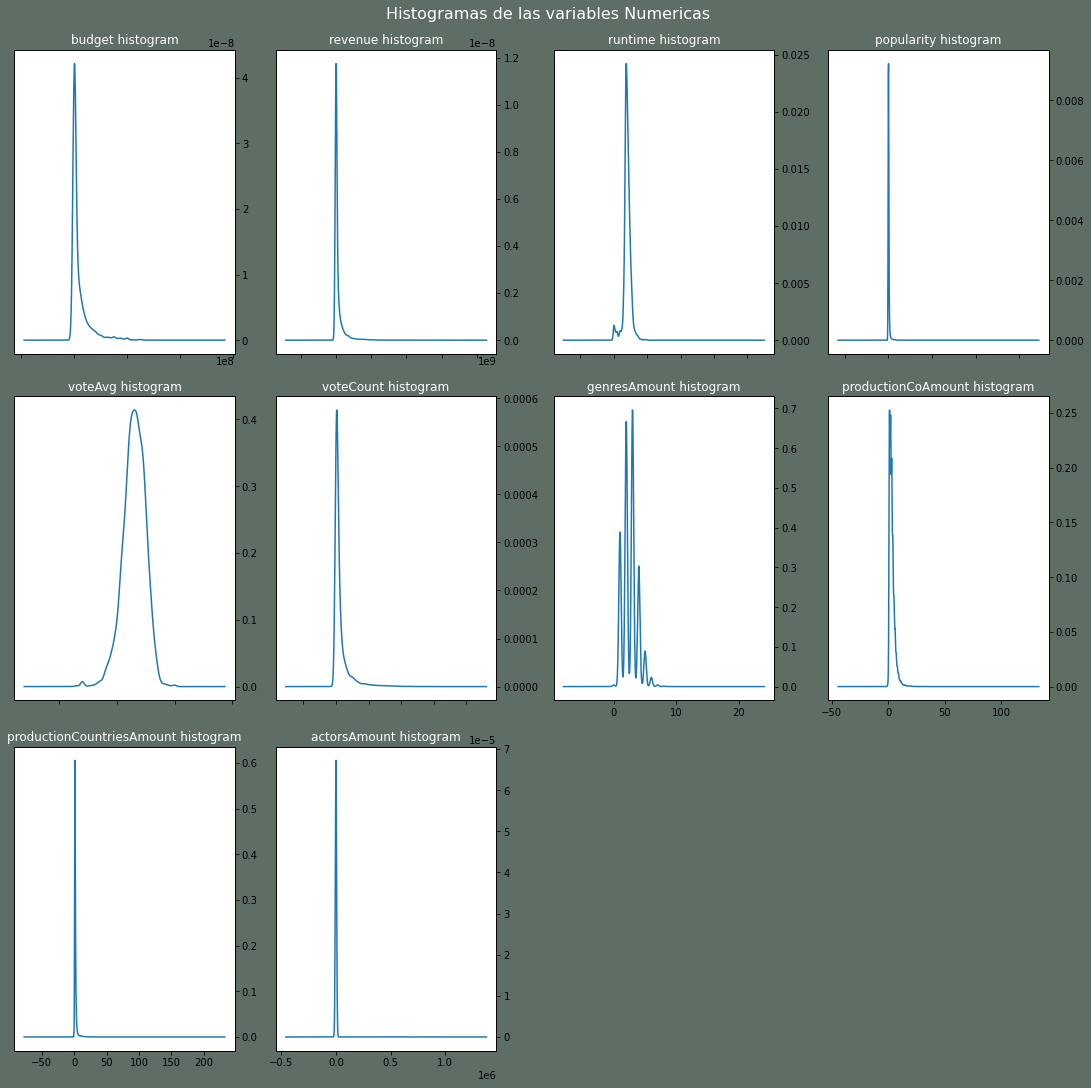

In [10]:
fig = plt.figure(figsize=(15,15),constrained_layout=True)
gs = fig.add_gridspec(nrows=3,ncols=4)
fig.set_facecolor('#5e6e65')

fig.suptitle('Histogramas de las variables Numericas', fontsize=16, color='w')

ax1 = fig.add_subplot(gs[0,0])
#ax1.hist(datos.budget)
datos.budget.plot.kde(ax=ax1,secondary_y=True)
ax1.set_title('budget histogram',color='w')

ax2 = fig.add_subplot(gs[0,1])
#ax2.hist(datos.revenue)
datos.revenue.plot.kde(ax=ax2,secondary_y=True)
ax2.set_title('revenue histogram',color='w')

ax3 = fig.add_subplot(gs[0,2])
#ax3.hist(datos.runtime)
datos.runtime.plot.kde(ax=ax3,secondary_y=True)
ax3.set_title('runtime histogram',color='w')

ax4 = fig.add_subplot(gs[0,3])
#ax4.hist(datos.popularity)
datos.popularity.plot.kde(ax=ax4,secondary_y=True)
ax4.set_title('popularity histogram',color='w')

ax5 = fig.add_subplot(gs[1,0])
#ax5.hist(datos.voteAvg)
datos.voteAvg.plot.kde(ax=ax5,secondary_y=True)
ax5.set_title('voteAvg histogram',color='w')

ax6 = fig.add_subplot(gs[1,1])
#ax6.hist(datos.voteCount)
datos.voteCount.plot.kde(ax=ax6,secondary_y=True)
ax6.set_title('voteCount histogram',color='w')

ax7 = fig.add_subplot(gs[1,2])
#ax7.hist(datos.genresAmount)
datos.genresAmount.plot.kde(ax=ax7,secondary_y=True)
ax7.set_title('genresAmount histogram',color='w')

ax8 = fig.add_subplot(gs[1,3])
#ax8.hist(datos.productionCoAmount)
datos.productionCoAmount.plot.kde(ax=ax8,secondary_y=True)
ax8.set_title('productionCoAmount histogram',color='w')

ax9 = fig.add_subplot(gs[2,0])
#ax9.hist(datos.productionCountriesAmount)
datos.productionCountriesAmount.plot.kde(ax=ax9,secondary_y=True)
ax9.set_title('productionCountriesAmount histogram',color='w')

ax10 = fig.add_subplot(gs[2,1])
#ax10.hist(datos.actorsAmount)
datos.actorsAmount.plot.kde(ax=ax10,secondary_y=True)
ax10.set_title('actorsAmount histogram',color='w')

#ax11 = fig.add_subplot(gs[2,0])
#ax11.hist(df.horsepower)
#df.horsepower.plot.kde(ax=ax11,secondary_y=True)
#ax11.set_title('horsepower histogram',color='w')

#ax12 = fig.add_subplot(gs[2,1])
#ax12.hist(df.peak_rpm)
#df.peak_rpm.plot.kde(ax=ax12,secondary_y=True)
#ax12.set_title('peak_rpm histogram',color='w')

### Tablas de Frecuencias

In [11]:
datos.budget.value_counts().to_frame().transpose()

,0,10000000,20000000,25000000,30000000,15000000,40000000,5000000,50000000,35000000,...,18900000,7280000,9250000,87500000,39200000,314701,370000,395168,878000,270000
budget,4811,205,199,179,172,164,149,139,120,118,...,1,1,1,1,1,1,1,1,1,1


In [12]:
datos.revenue.value_counts().to_frame().transpose()

,0.0,1000000.0,20000000.0,12000000.0,30000000.0,8000000.0,10000000.0,7000000.0,3000000.0,2000000.0,...,30231200.0,65705772.0,236185.0,424988211.0,7033683.0,170432927.0,133511855.0,27610873.0,25513752.0,3494070.0
revenue,4777,7,6,6,6,5,5,5,5,5,...,1,1,1,1,1,1,1,1,1,1


In [13]:
datos.runtime.value_counts().to_frame().transpose()

,90,100,95,93,97,94,105,92,98,96,...,17,317,1,400,248,200,184,176,29,247
runtime,417,289,277,267,243,241,235,233,230,228,...,1,1,1,1,1,1,1,1,1,1


In [14]:
datos.popularity.value_counts().to_frame().transpose()

,9.336,20.778,24.393,15.902,13.196,15.321,16.679,11.878,13.486,11.249,...,35.900,856.038,19.937,250.222,8.523,12.418,25.332,10.101,28.703,30.500
popularity,4,4,4,4,4,4,4,4,4,4,...,1,1,1,1,1,1,1,1,1,1


In [15]:
datos.voteAvg.value_counts().to_frame().transpose()

,6.7,6.3,6.4,6.8,6.5,6.6,6.2,6.1,7.1,7.0,...,2.5,3.0,9.1,9.4,9.6,3.1,8.9,2.7,1.3,9.8
voteAvg,424,416,416,414,413,412,404,396,373,372,...,2,2,2,1,1,1,1,1,1,1


In [16]:
datos.voteCount.value_counts().to_frame().transpose()

,1,2,4,8,6,3,9,5,18,13,...,1260,3309,5382,7431,3341,17684,3349,5398,3357,6147
voteCount,54,53,46,40,40,40,33,33,32,32,...,1,1,1,1,1,1,1,1,1,1


In [17]:
datos.genresAmount.value_counts().to_frame().transpose()

,3,2,1,4,5,6,7,0,8,9,16
genresAmount,3201,3061,1784,1395,410,106,19,18,4,1,1


In [18]:
datos.productionCoAmount.value_counts().to_frame().transpose()

,1,2,3,4,5,6,7,8,9,10,...,16,19,21,22,89,33,25,32,24,26
productionCoAmount,2440,2304,1950,1260,748,483,280,169,112,59,...,5,2,2,2,1,1,1,1,1,1


In [19]:
datos.productionCountriesAmount.value_counts().to_frame().transpose()

,1,2,3,4,5,0,6,7,10,8,...,28,50,33,57,72,56,21,155,44,34
productionCountriesAmount,7041,1718,542,206,93,89,50,34,31,30,...,2,1,1,1,1,1,1,1,1,1


In [20]:
datos.actorsAmount.value_counts().to_frame().transpose()

,15,16,10,17,12,13,20,14,18,19,...,187,227,640103,634646,448361,188,196,220,815762,447377
actorsAmount,364,324,311,305,300,299,299,292,292,271,...,1,1,1,1,1,1,1,1,1,1


## ojo al tejo

<AxesSubplot:>

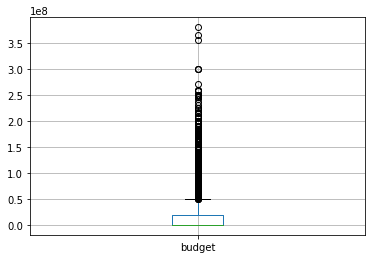

In [21]:
datos[["budget"]].boxplot()

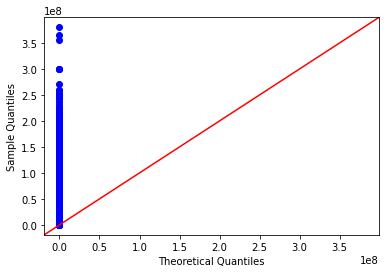

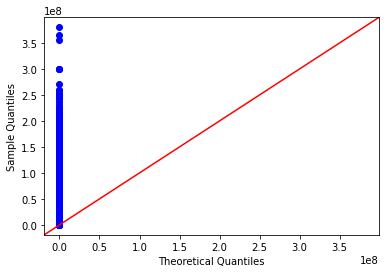

In [22]:
sm.qqplot(datos[['budget']],line='45')

# Ejercicio 4

## ¿Cuáles son las 10 películas que contaron con más presupuesto? 

In [23]:
budgetTop = datos.sort_values(by='budget', ascending=False).reset_index(drop=True)
budgetTop = budgetTop.filter(['title','budget'],axis=1)
budgetTop.head(n=10)

,title,budget
0,Pirates of the Caribbean: On Stranger Tides,380000000
1,Avengers: Age of Ultron,365000000
2,Avengers: Endgame,356000000
3,Justice League,300000000
4,Avengers: Infinity War,300000000
5,Pirates of the Caribbean: At World's End,300000000
6,Superman Returns,270000000
7,The Lion King,260000000
8,Tangled,260000000
9,Spider-Man 3,258000000


### ¿Cuáles son las 10 películas que más ingresos tuvieron? 

In [24]:
revenueTop = datos.sort_values(by='revenue', ascending=False).reset_index(drop=True)
revenueTop = revenueTop.filter(['title','revenue'],axis=1)
revenueTop.head(n=10)

,title,revenue
0,Avatar,2.847246e+09
1,Avengers: Endgame,2.797801e+09
2,Titanic,2.187464e+09
3,Star Wars: The Force Awakens,2.068224e+09
4,Avengers: Infinity War,2.046240e+09
5,Jurassic World,1.671713e+09
6,The Lion King,1.667635e+09
7,Spider-Man: No Way Home,1.631853e+09
8,The Avengers,1.518816e+09
9,Furious 7,1.515048e+09


### ¿Cuál es la película que más votos tuvo? 

In [25]:
voteCount = datos.sort_values(by='voteCount', ascending=False).reset_index(drop=True)
voteCount = voteCount.filter(['title','voteCount'],axis=1)
voteCount.head(n=1)

,title,voteCount
0,Inception,30788


### ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios? 

In [26]:
#DUDA
voteAvgCount = datos.sort_values(by='voteAvg', ascending=True).reset_index(drop=True)
voteAvgCount = voteAvgCount.filter(['title','voteAvg'],axis=1)
voteAvgCount.head(n=1)

,title,voteAvg
0,DAKAICHI -I'm Being Harassed by the Sexiest Ma...,1.3


### 4.5¿Cuántas  películas  se  hicieron  en  cada  año?

Text(0.5, 0, 'Year')

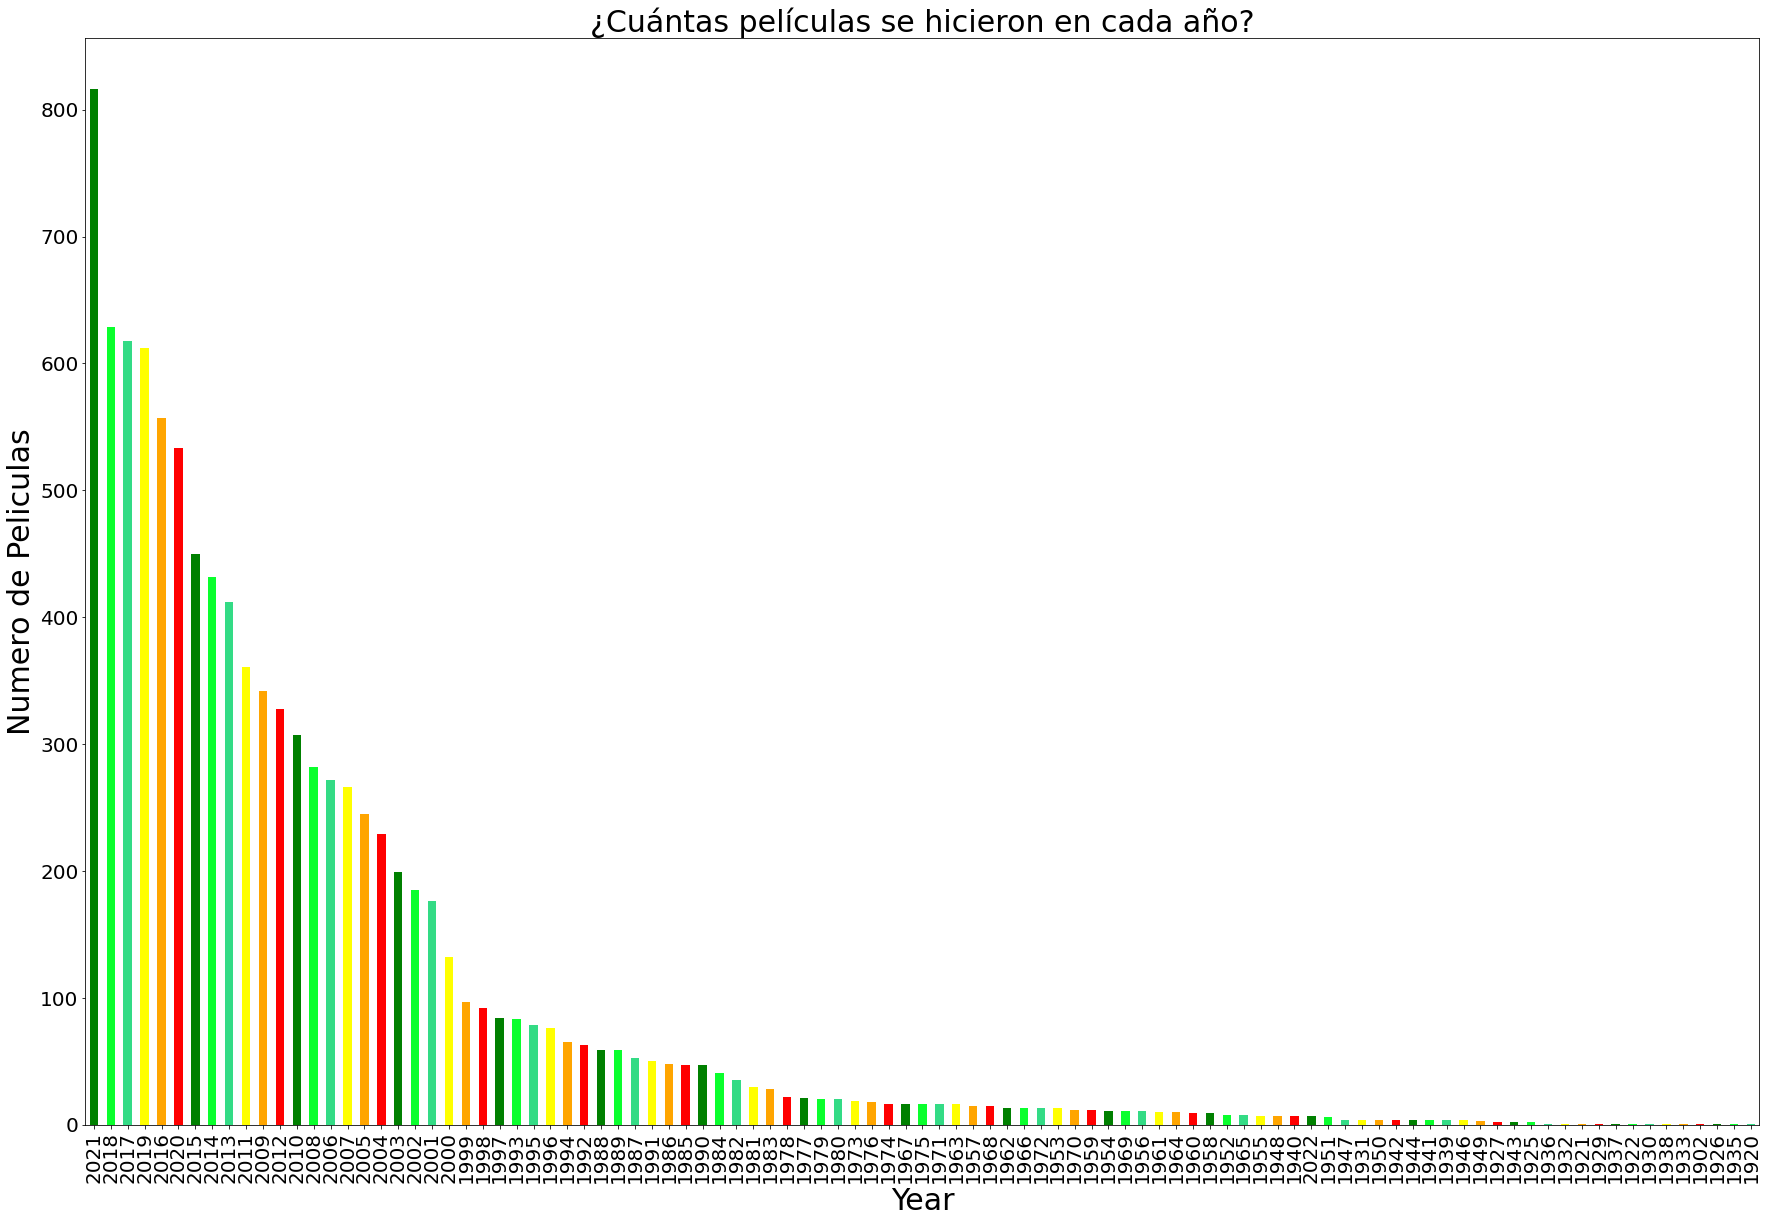

In [27]:
#creating new dataframe just in case
yearData= datos.copy()
yearData['releaseDate'] = pd.DatetimeIndex(yearData['releaseDate']).year
#yearData.releaseDate.value_counts().to_frame().transpose()
#plot bar 
fig, ax = plt.subplots(figsize=(30,20)) 
ax = yearData.releaseDate.value_counts().plot.bar(color=['green','#0AFF2D','#33DB85','yellow','orange','red'],fontsize=20)
plt.title('¿Cuántas películas se hicieron en cada año?',fontsize=30)
plt.ylabel('Numero de Peliculas',fontsize=30)
plt.xlabel('Year',fontsize=30)

In [28]:
yearData.releaseDate.value_counts().to_frame().transpose()

,2021,2018,2017,2019,2016,2020,2015,2014,2013,2011,...,1929,1937,1922,1930,1938,1933,1902,1926,1935,1920
releaseDate,816,629,618,612,557,533,450,432,412,361,...,1,1,1,1,1,1,1,1,1,1


### 4.6 ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico 


In [29]:
#creating new dataframe just in case
genderData= datos.copy()
#new dataframe, create a new column and we do a split
genderData["genero_principal"]=datos.genres.str.split('|').str[0]



Text(0.5, 0, 'generos')

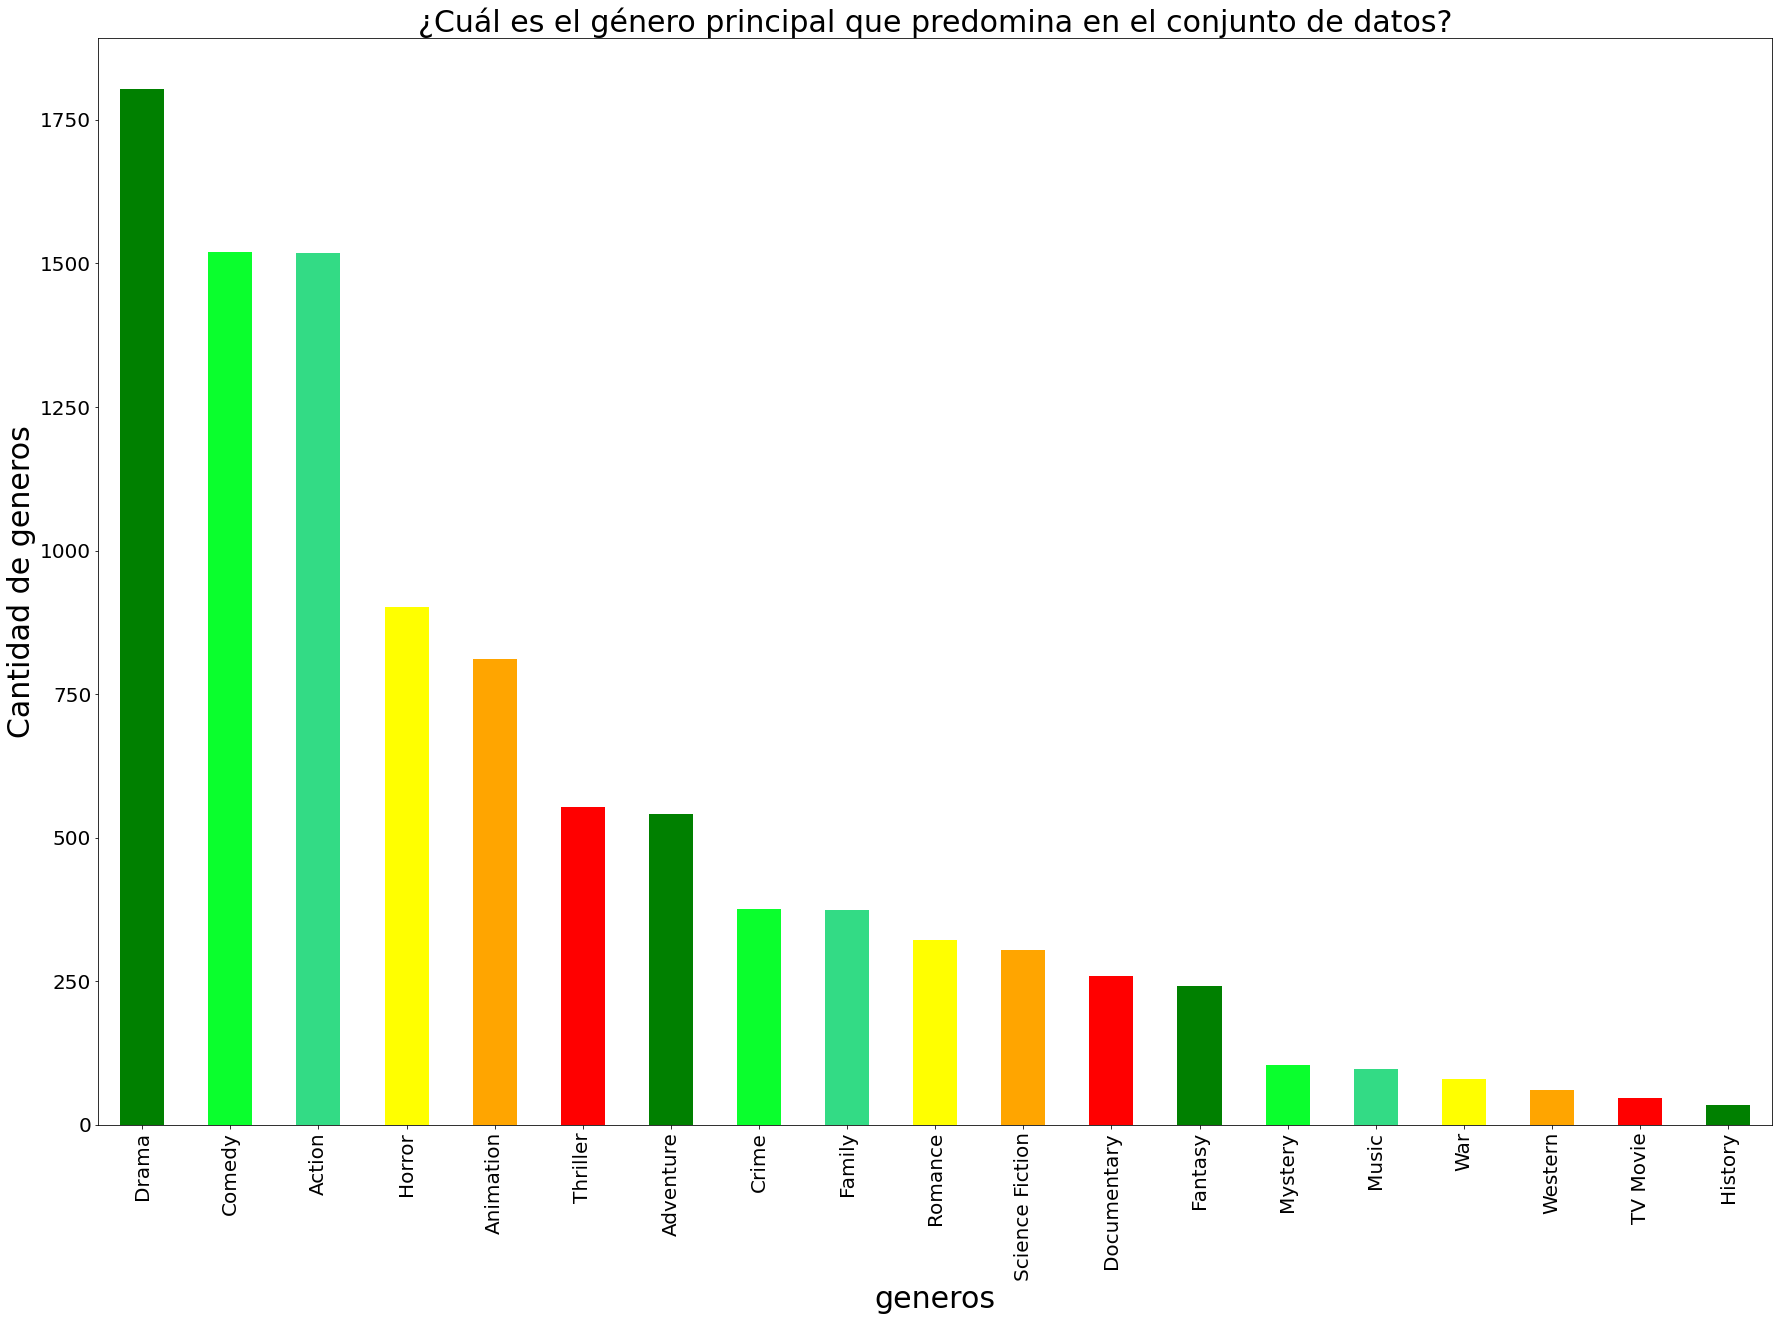

In [30]:
#plot bar 
fig, ax = plt.subplots(figsize=(30,20)) 
ax = genderData.genero_principal.value_counts().plot.bar(color=['green','#0AFF2D','#33DB85','yellow','orange','red'],fontsize=20)
plt.title('¿Cuál es el género principal que predomina en el conjunto de datos?',fontsize=30)
plt.ylabel('Cantidad de generos',fontsize=30)
plt.xlabel('generos',fontsize=30)

In [31]:
#creating new dataframe just in case
genderData= genderData.sort_values(by='releaseDate', ascending=False).reset_index(drop=True)
genderData = genderData.head(20)




Text(0.5, 0, 'generos')

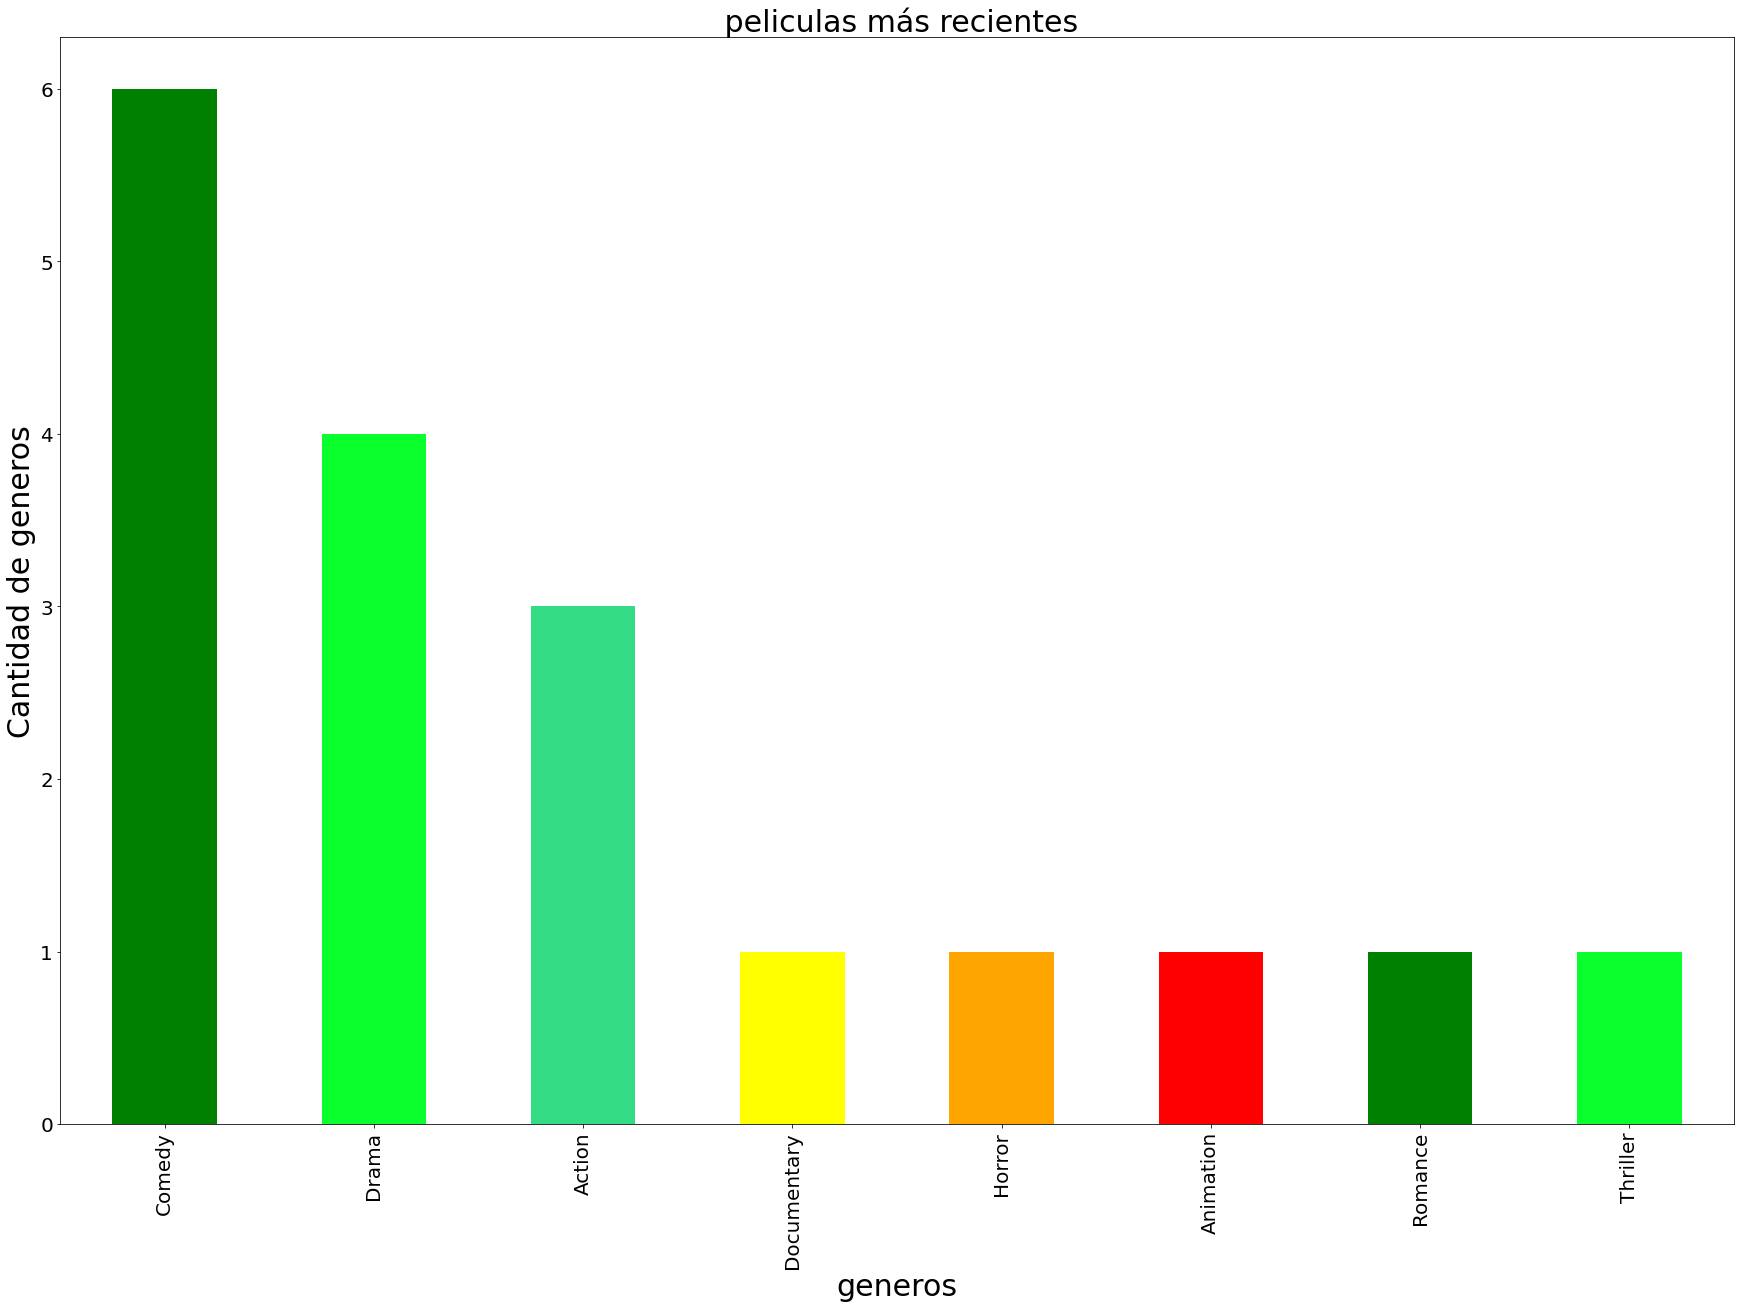

In [32]:
#plot bar 
fig, ax = plt.subplots(figsize=(30,20)) 
ax = genderData.genero_principal.value_counts().plot.bar(color=['green','#0AFF2D','#33DB85','yellow','orange','red'],fontsize=20)
plt.title(' peliculas más recientes',fontsize=30)
plt.ylabel('Cantidad de generos',fontsize=30)
plt.xlabel('generos',fontsize=30)

### 4.7¿Las películas de qué genero principal obtuvieron mayores ganancias?

In [33]:
#creating new dataframe just in case
genderData1= datos.copy()
#new dataframe, create a new column and we do a split
genderData1["genero_principal"]=datos.genres.str.split('|').str[0]
#genderData1.groupby(['revenue']).sort_values(by='revenue', ascending=True).reset_index(drop=True)
genderData1=genderData1.groupby("genero_principal")["revenue"].sum().sort_values(ascending=False)

Text(0.5, 0, 'generos')

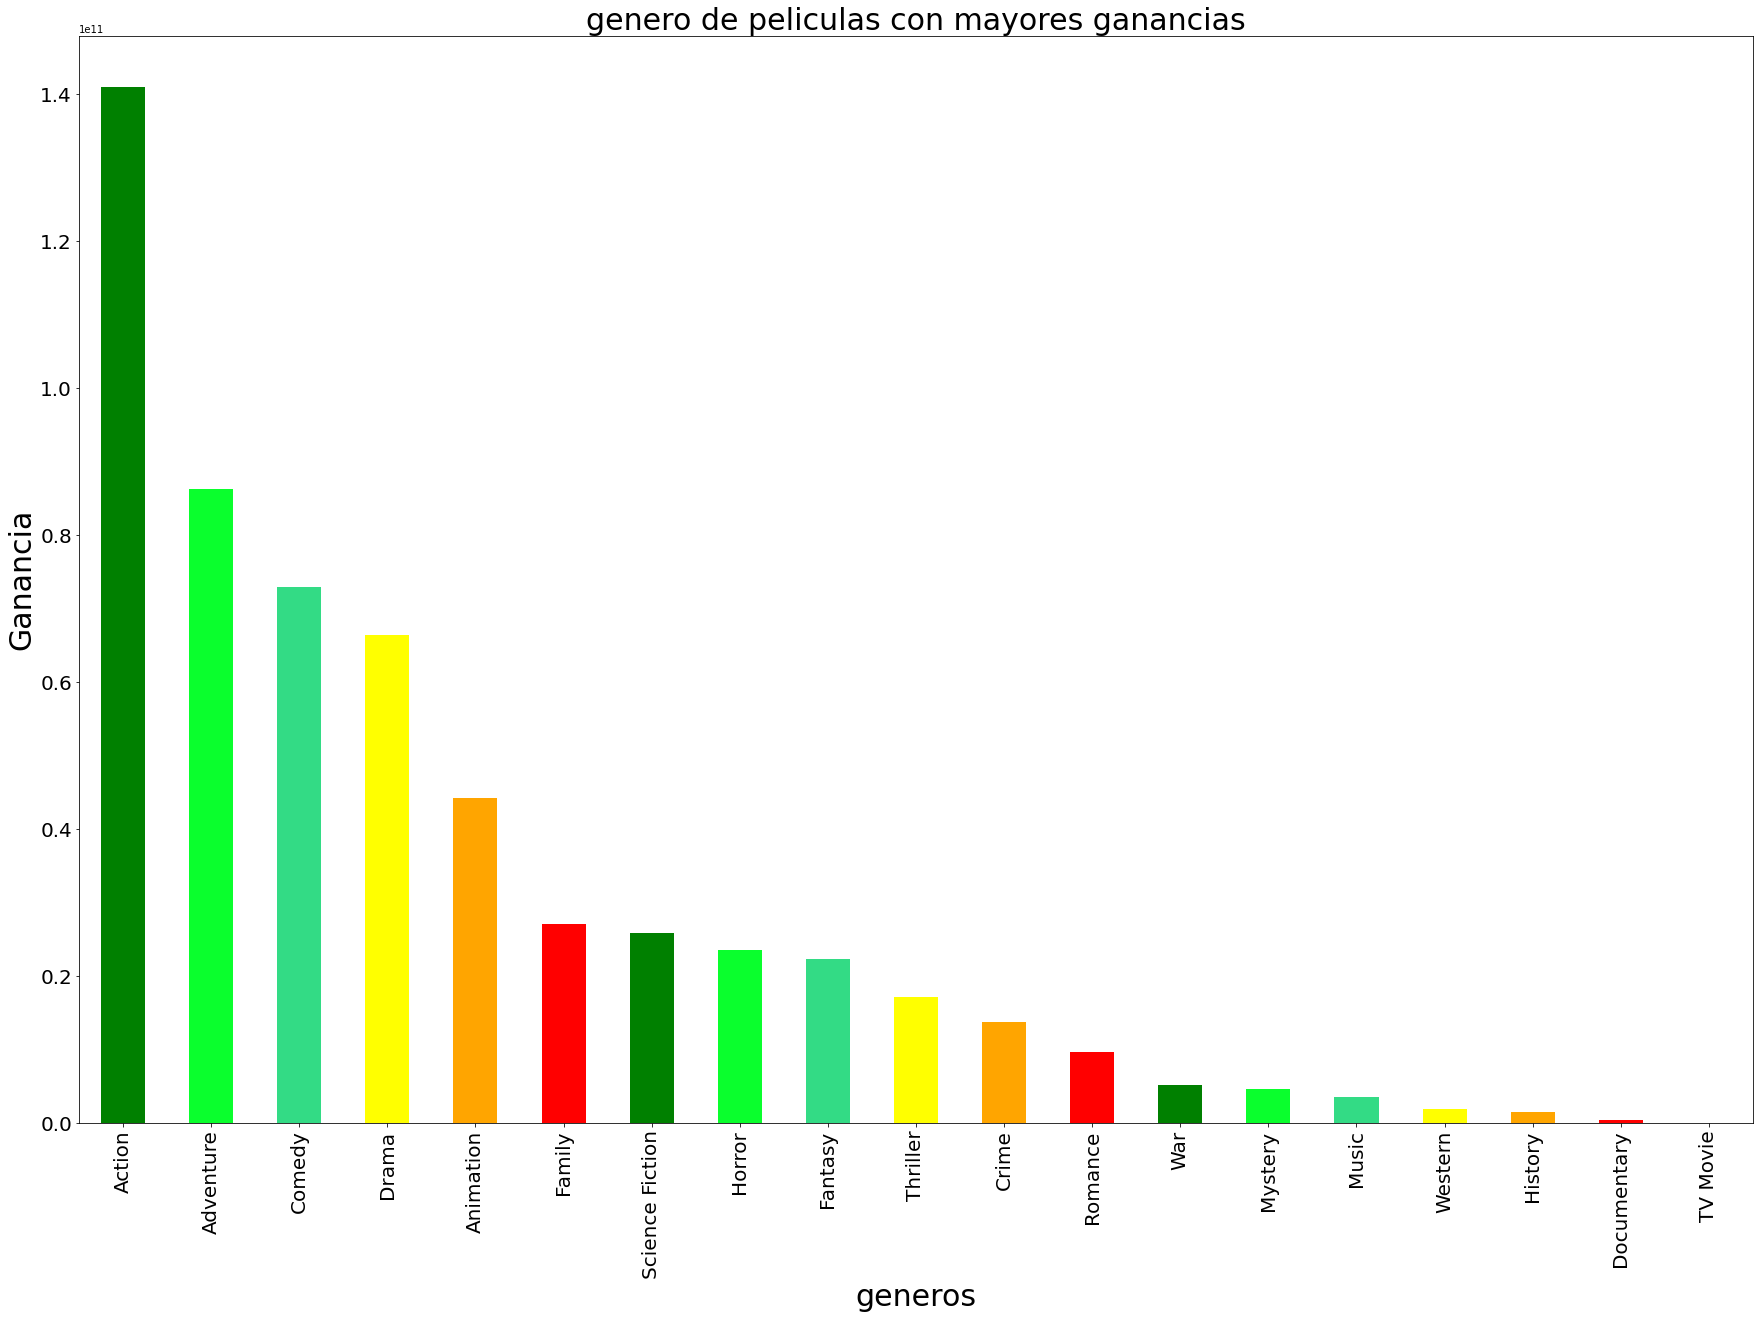

In [34]:
#plot bar 
fig, ax = plt.subplots(figsize=(30,20)) 
ax = genderData1.plot.bar(color=['green','#0AFF2D','#33DB85','yellow','orange','red'],fontsize=20)
plt.title('genero de peliculas con mayores ganancias',fontsize=30)
plt.ylabel('Ganancia',fontsize=30)
plt.xlabel('generos',fontsize=30)

### 4.8¿La cantidad de actores influye en los ingresos de las películas?¿se han hecho  películas con más actores en los últimos años?

In [35]:
#creating new dataframe just in case
actorsData= datos.copy()
#new dataframe, create a new column and we do a split
#actorsData["genero_principal"]=datos.genres.str.split('|').str[0]
#genderData1.groupby(['revenue']).sort_values(by='revenue', ascending=True).reset_index(drop=True)
actorsData=actorsData.groupby("actorsAmount")["revenue"].sum().sort_index(ascending=True)
actorsData= actorsData.head(100)      



Text(0.5, 0, 'Cantidad de actores')

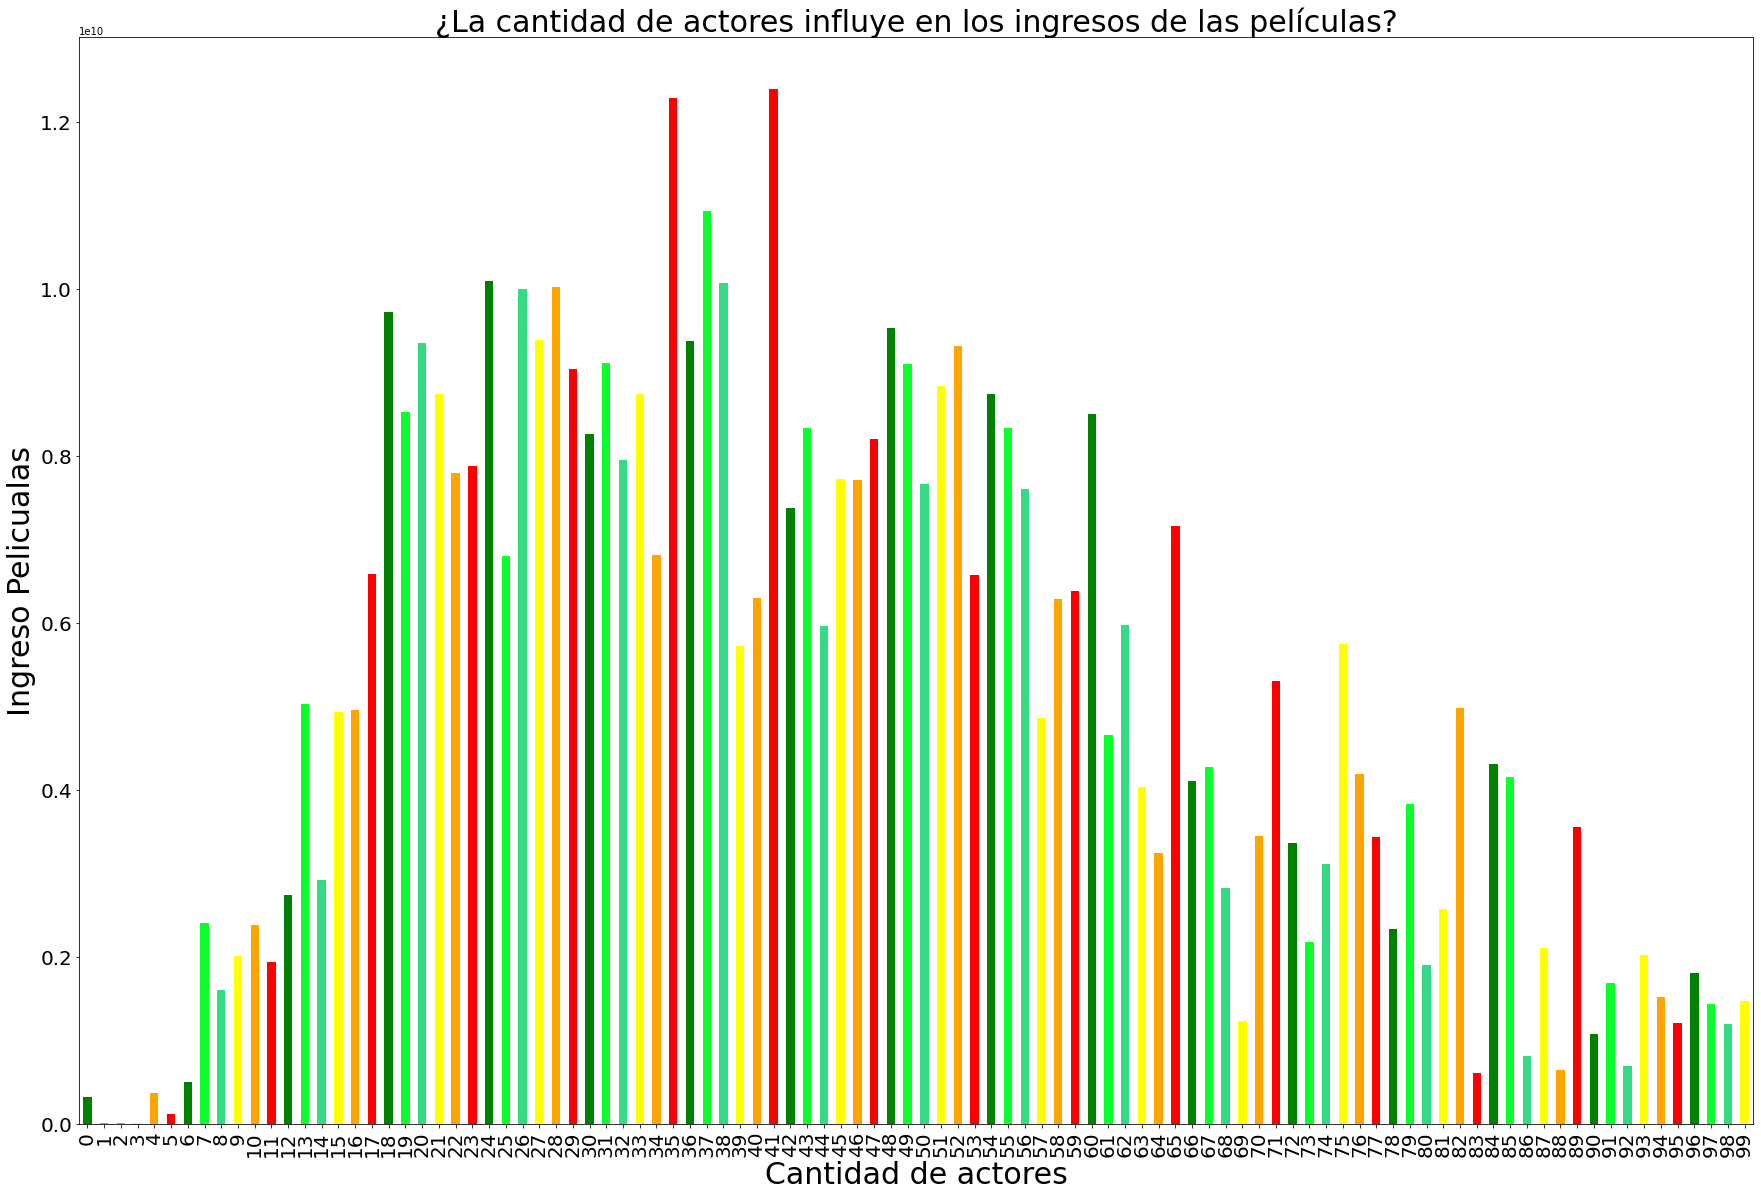

In [36]:
#plot bar 
fig, ax = plt.subplots(figsize=(30,20)) 
ax = actorsData.plot.bar(color=['green','#0AFF2D','#33DB85','yellow','orange','red'],fontsize=20)
plt.title('¿La cantidad de actores influye en los ingresos de las películas?',fontsize=30)
plt.ylabel('Ingreso Pelicualas',fontsize=30)
plt.xlabel('Cantidad de actores',fontsize=30)


In [37]:
#creating new dataframe just in case
actorsData1= datos.copy()

#creating new dataframe just in case
actorsData1['releaseDate']=pd.DatetimeIndex(actorsData1['releaseDate']).year
actorsData1= actorsData1.sort_values(['releaseDate', 'actorsAmount'],ascending = [False, False]).reset_index(drop=True)
# column actorsAmount that has a value bigger than 100000
actorsData11 = actorsData1[ actorsData1['actorsAmount'] > 100000 ].index
  
# drop these row indexes
# from dataFrame
actorsData1.drop(actorsData11, inplace = True)

#actorsData1[['releaseDate', 'actorsAmount']].head(50)

#dataframe con el releaseDate y la mediana de la cantidad de actores
#actorsData1=actorsData1.groupby(["releaseDate"])["actorsAmount"].median()

Text(0.5, 0, 'Years')

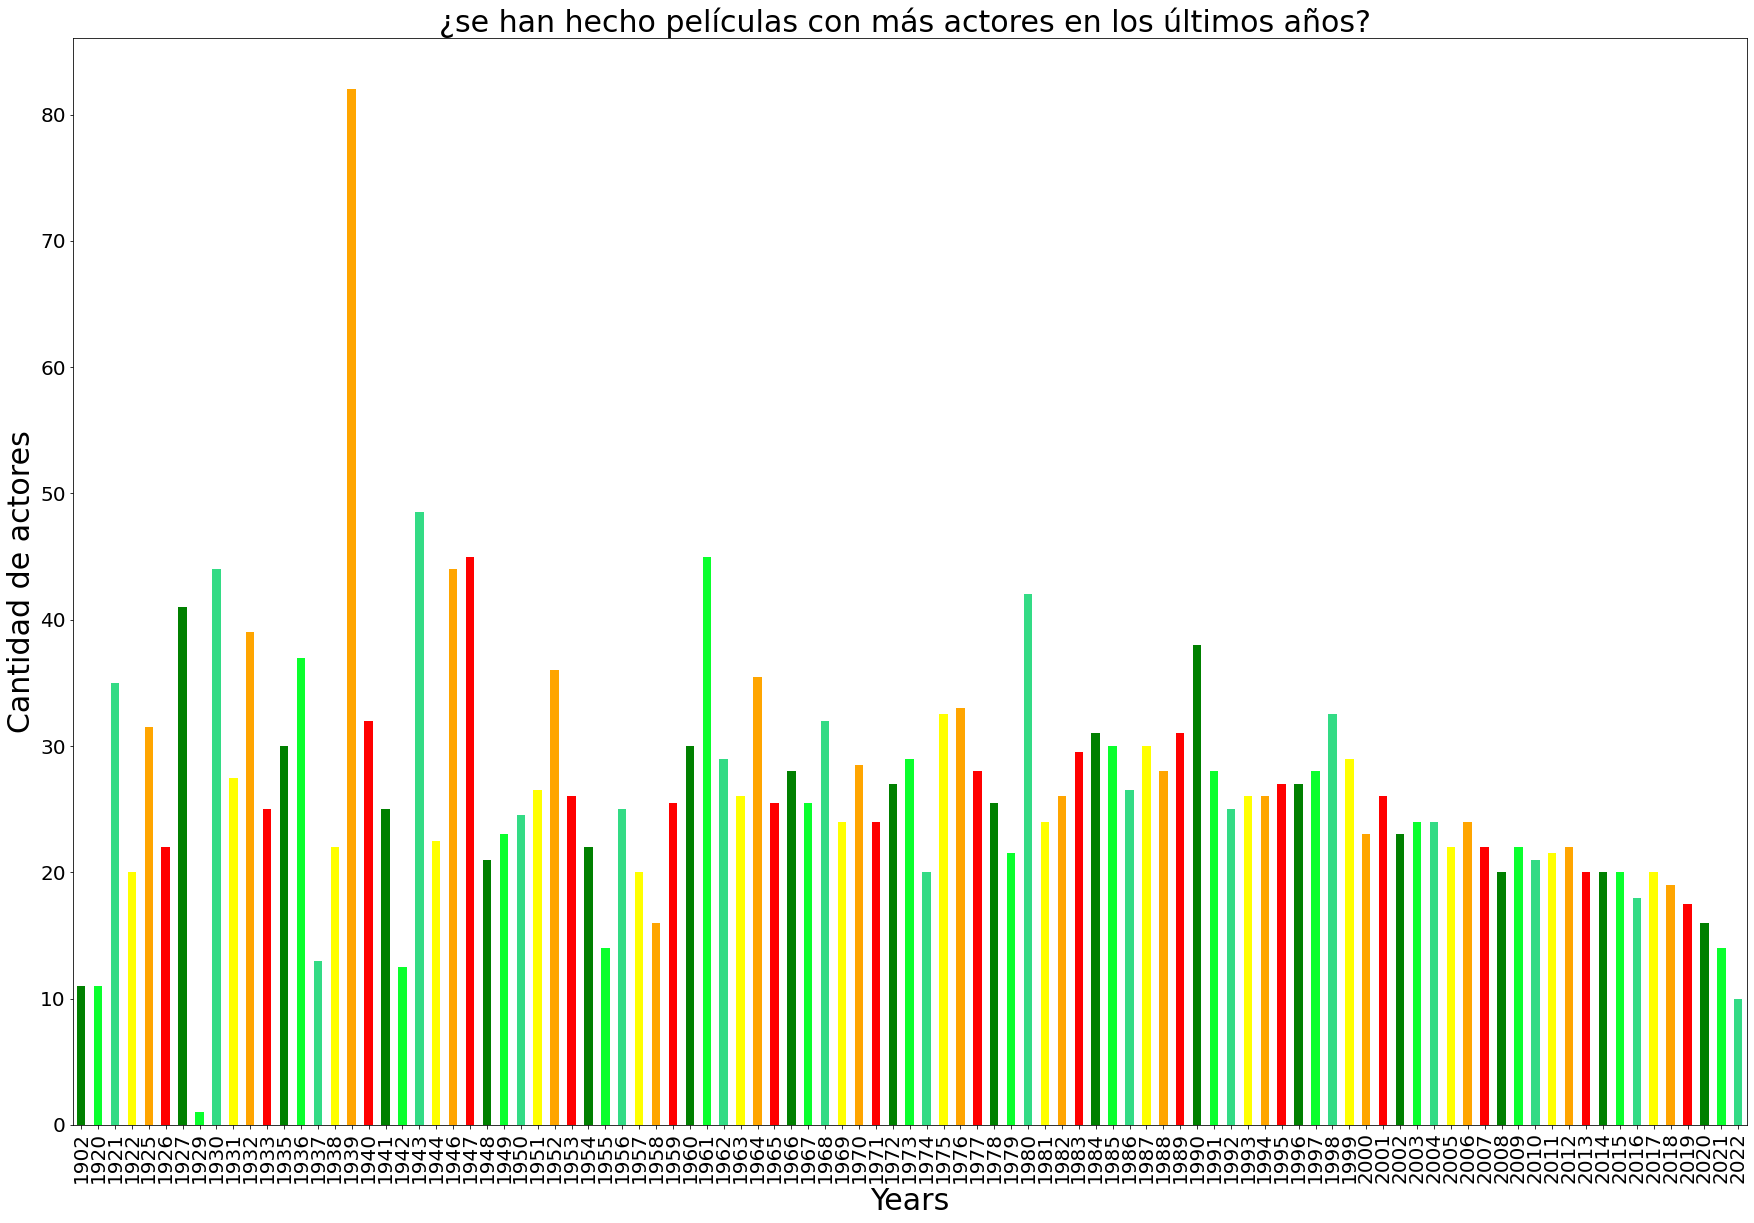

In [38]:
#plot bar 
fig, ax = plt.subplots(figsize=(30,20)) 
ax = actorsData1.groupby(["releaseDate"])["actorsAmount"].median().plot.bar(fontsize=20,color=['green','#0AFF2D','#33DB85','yellow','orange','red'])
plt.title('¿se han hecho películas con más actores en los últimos años? ',fontsize=30)
plt.ylabel('Cantidad de actores',fontsize=30)
plt.xlabel('Years',fontsize=30)

### 4.9 ¿Es posible que la cantidad de hombres y mujeres en el  reparto influya en  la popularidad y los ingresos de las películas? 

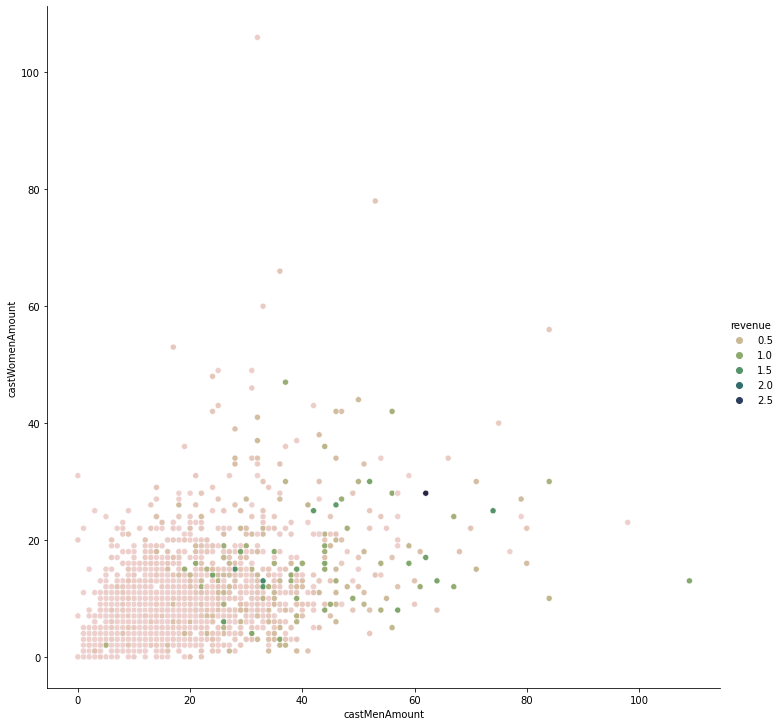

In [39]:
menWomen = datos.copy()
menWomen = menWomen.dropna()

#menWomen = menWomen[ menWomen['revenue'] == 0.0 ].index
menWomen = menWomen.drop(menWomen[menWomen.revenue < 1].index).reset_index(drop=True)
sns.relplot(data=menWomen, x="castMenAmount", y="castWomenAmount", hue="revenue",height=10,palette=sns.color_palette("ch:s=.50,rot=-.99", as_cmap=True))
#plt.figure(figsize=(20,20))

###  4.10 ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas? 

In [40]:
#datos.head()
directores = datos.copy()
#get median of votesCounts
median = datos.voteCount.median()
#drop movies with less votes than the median
directores = directores[directores.voteCount >= median]
#directores

#creat columns to get a principal director
directores["director_principal"]=directores.director.str.split('|').str[0]
directores.sort_values(by='voteAvg', ascending=False).reset_index(drop=True)
directores[['title','voteAvg','director_principal']].sort_values(by='voteAvg', ascending=False).reset_index(drop=True).head(20)

,title,voteAvg,director_principal
0,The Shawshank Redemption,8.7,Frank Darabont
1,The Godfather,8.7,Francis Ford Coppola
2,Dilwale Dulhania Le Jayenge,8.7,Aditya Chopra
3,Gabriel's Inferno Part III,8.6,Tosca Musk
4,The Godfather: Part II,8.6,Francis Ford Coppola
5,Gabriel's Inferno Part II,8.6,Tosca Musk
6,Gabriel's Inferno,8.6,Tosca Musk
7,Your Name.,8.6,Makoto Shinkai
8,Schindler's List,8.6,Steven Spielberg
9,The Green Mile,8.5,Frank Darabont


### 4.11 ¿Cómo  se  correlacionan  los  presupuestos  con  los  ingresos?  ¿Los  altos presupuestos significan altos ingresos?

<AxesSubplot:>

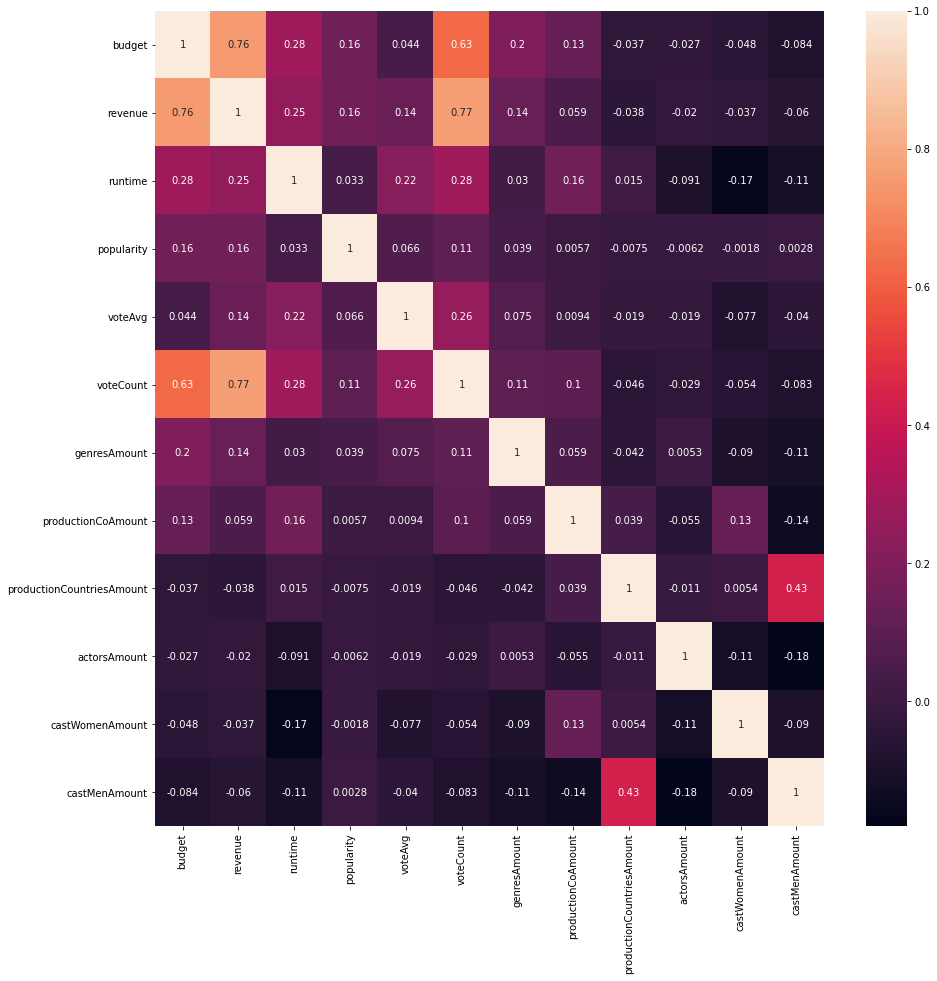

In [41]:
data_corr = datos.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns,annot=True, ax=ax)

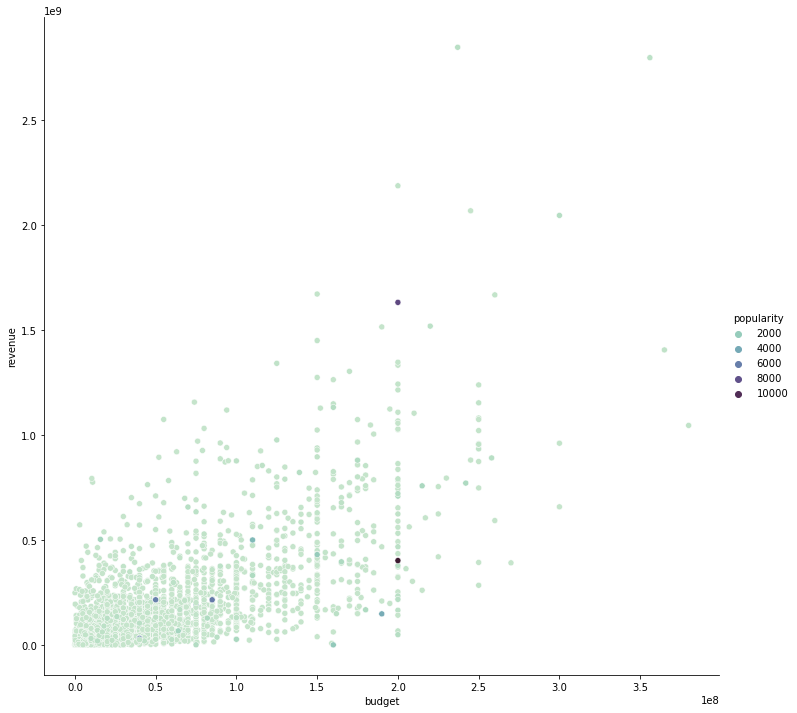

In [42]:
budgetRevunue = datos.copy()
#get median of votesCounts
median = datos.voteCount.median()
#drop movies with less revenue than the 0
budgetRevunue = budgetRevunue[budgetRevunue.revenue > 1]
#drop movies with less budget than the 0
budgetRevunue = budgetRevunue[budgetRevunue.budget > 1]
median = datos.voteCount.median()
#drop movies with less votes than the median
budgetRevunue = budgetRevunue[budgetRevunue.voteCount >= median]

#budgetRevunue
sns.relplot(data=budgetRevunue, x="budget", y="revenue",hue="popularity",height=10,palette=sns.color_palette("ch:s=.90,rot=-.75", as_cmap=True))

###  4.12 ¿Se asocian ciertos meses de lanzamiento con mejores ingresos? 

Text(0.5, 0, 'meses')

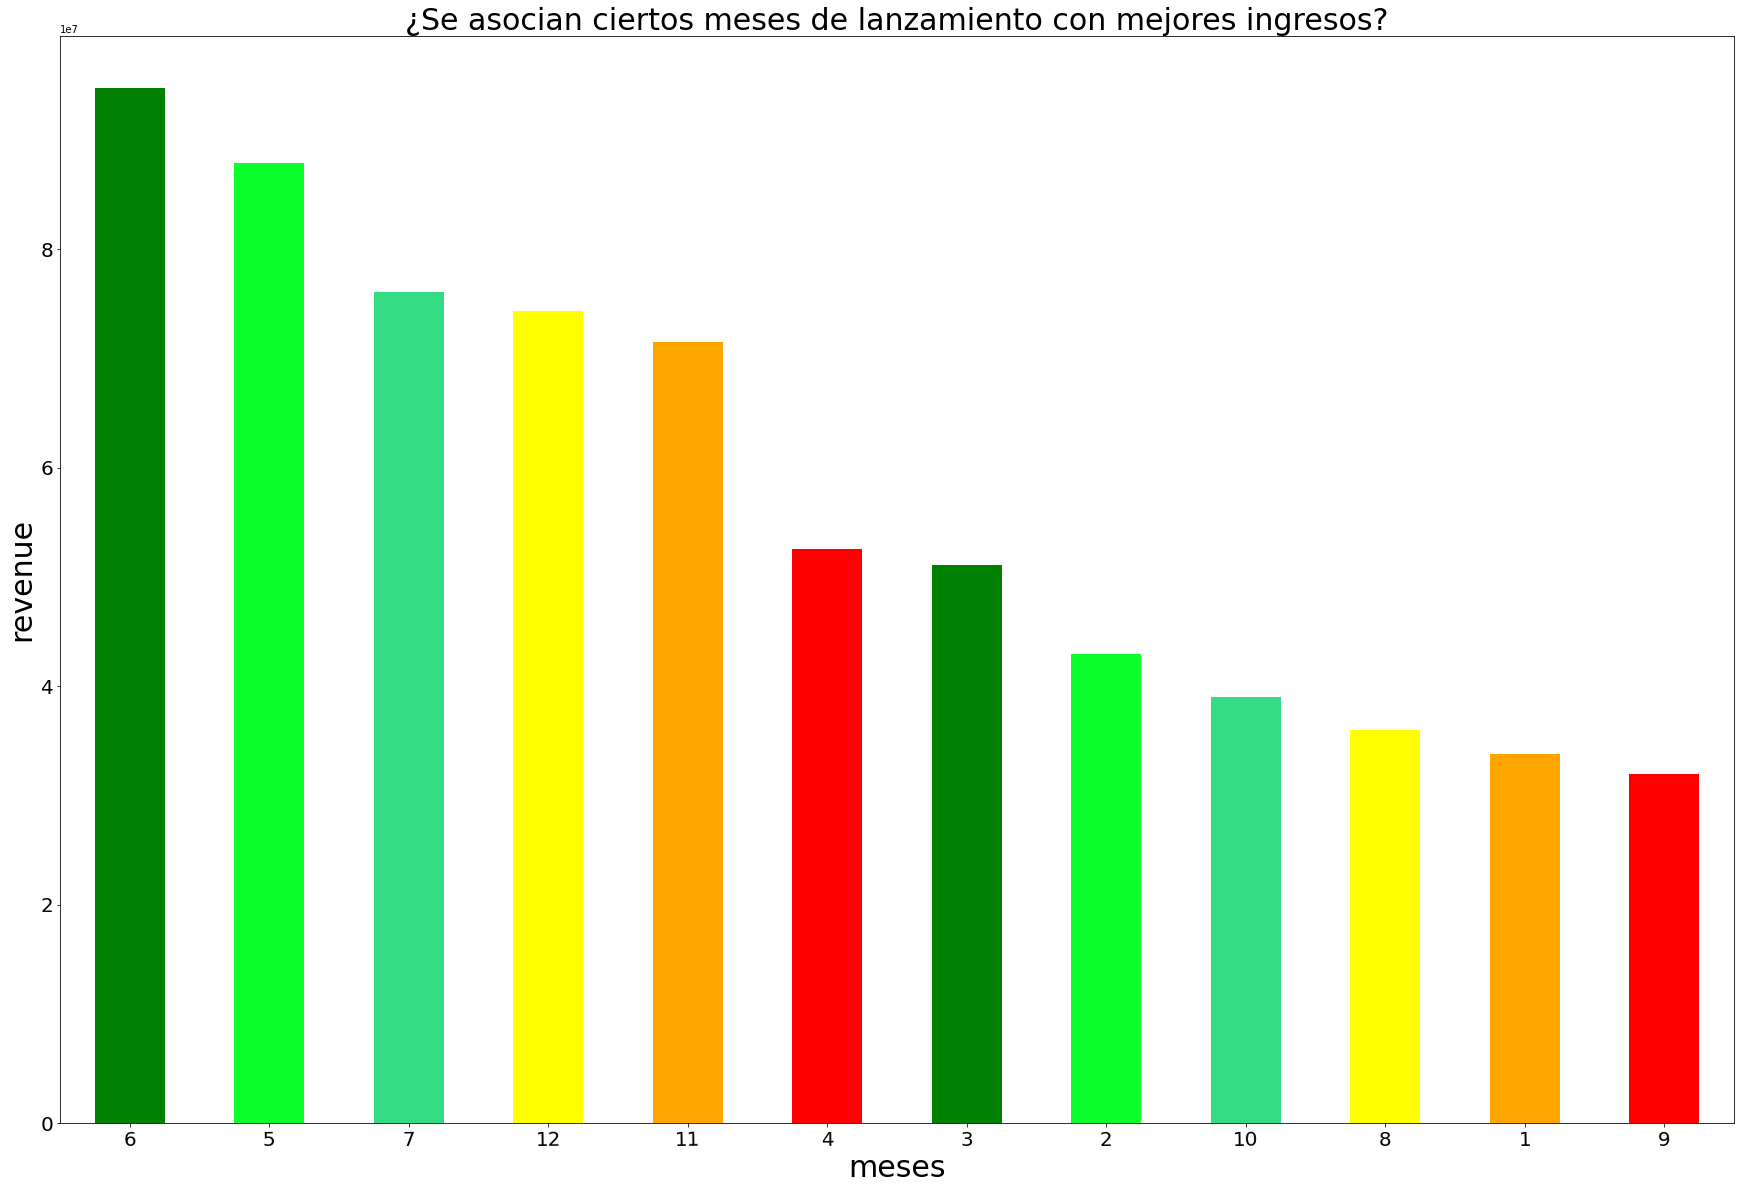

In [43]:
month_revenue = datos.copy()
month_revenue['releaseDate'] = pd.DatetimeIndex(month_revenue['releaseDate']).month
month_revenue=month_revenue.groupby("releaseDate")["revenue"].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(30,20)) 
ax = month_revenue.plot.bar(color=['green','#0AFF2D','#33DB85','yellow','orange','red'],fontsize=20,rot=1)
plt.title('¿Se asocian ciertos meses de lanzamiento con mejores ingresos?',fontsize=30)
plt.ylabel('revenue',fontsize=30)
plt.xlabel('meses',fontsize=30)

### 4.13 ¿En qué meses se han visto los lanzamientos con mejores ingresos?¿cuantas películas, en promedio, se han lanzado por mes?

Text(0.5, 0, 'meses')

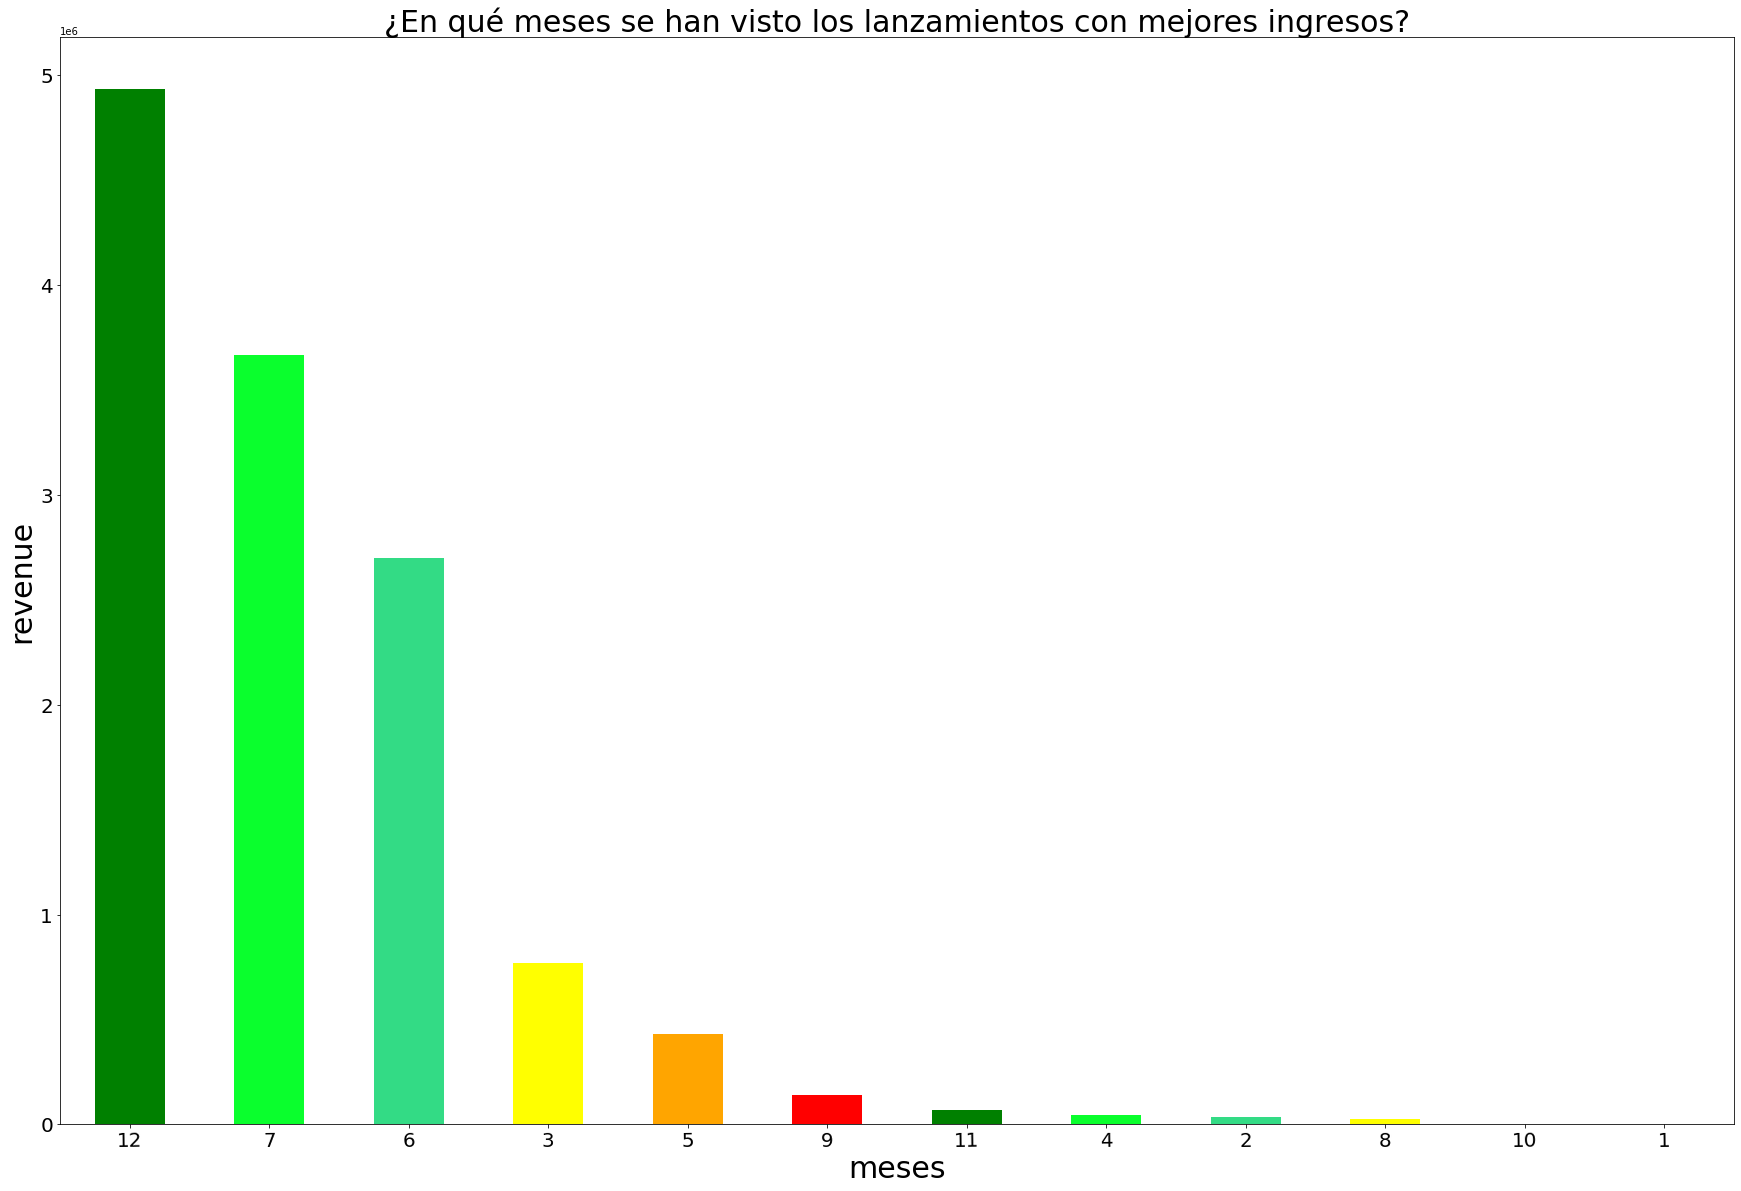

In [44]:
month_revenue = datos.copy()
month_revenue['releaseDate'] = pd.DatetimeIndex(month_revenue['releaseDate']).month
month_revenue=month_revenue.groupby("releaseDate")["revenue"].median().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(30,20)) 
ax = month_revenue.plot.bar(color=['green','#0AFF2D','#33DB85','yellow','orange','red'],fontsize=20,rot=1)
plt.title('¿En qué meses se han visto los lanzamientos con mejores ingresos?',fontsize=30)
plt.ylabel('revenue',fontsize=30)
plt.xlabel('meses',fontsize=30)

Text(0.5, 0, 'Meses')

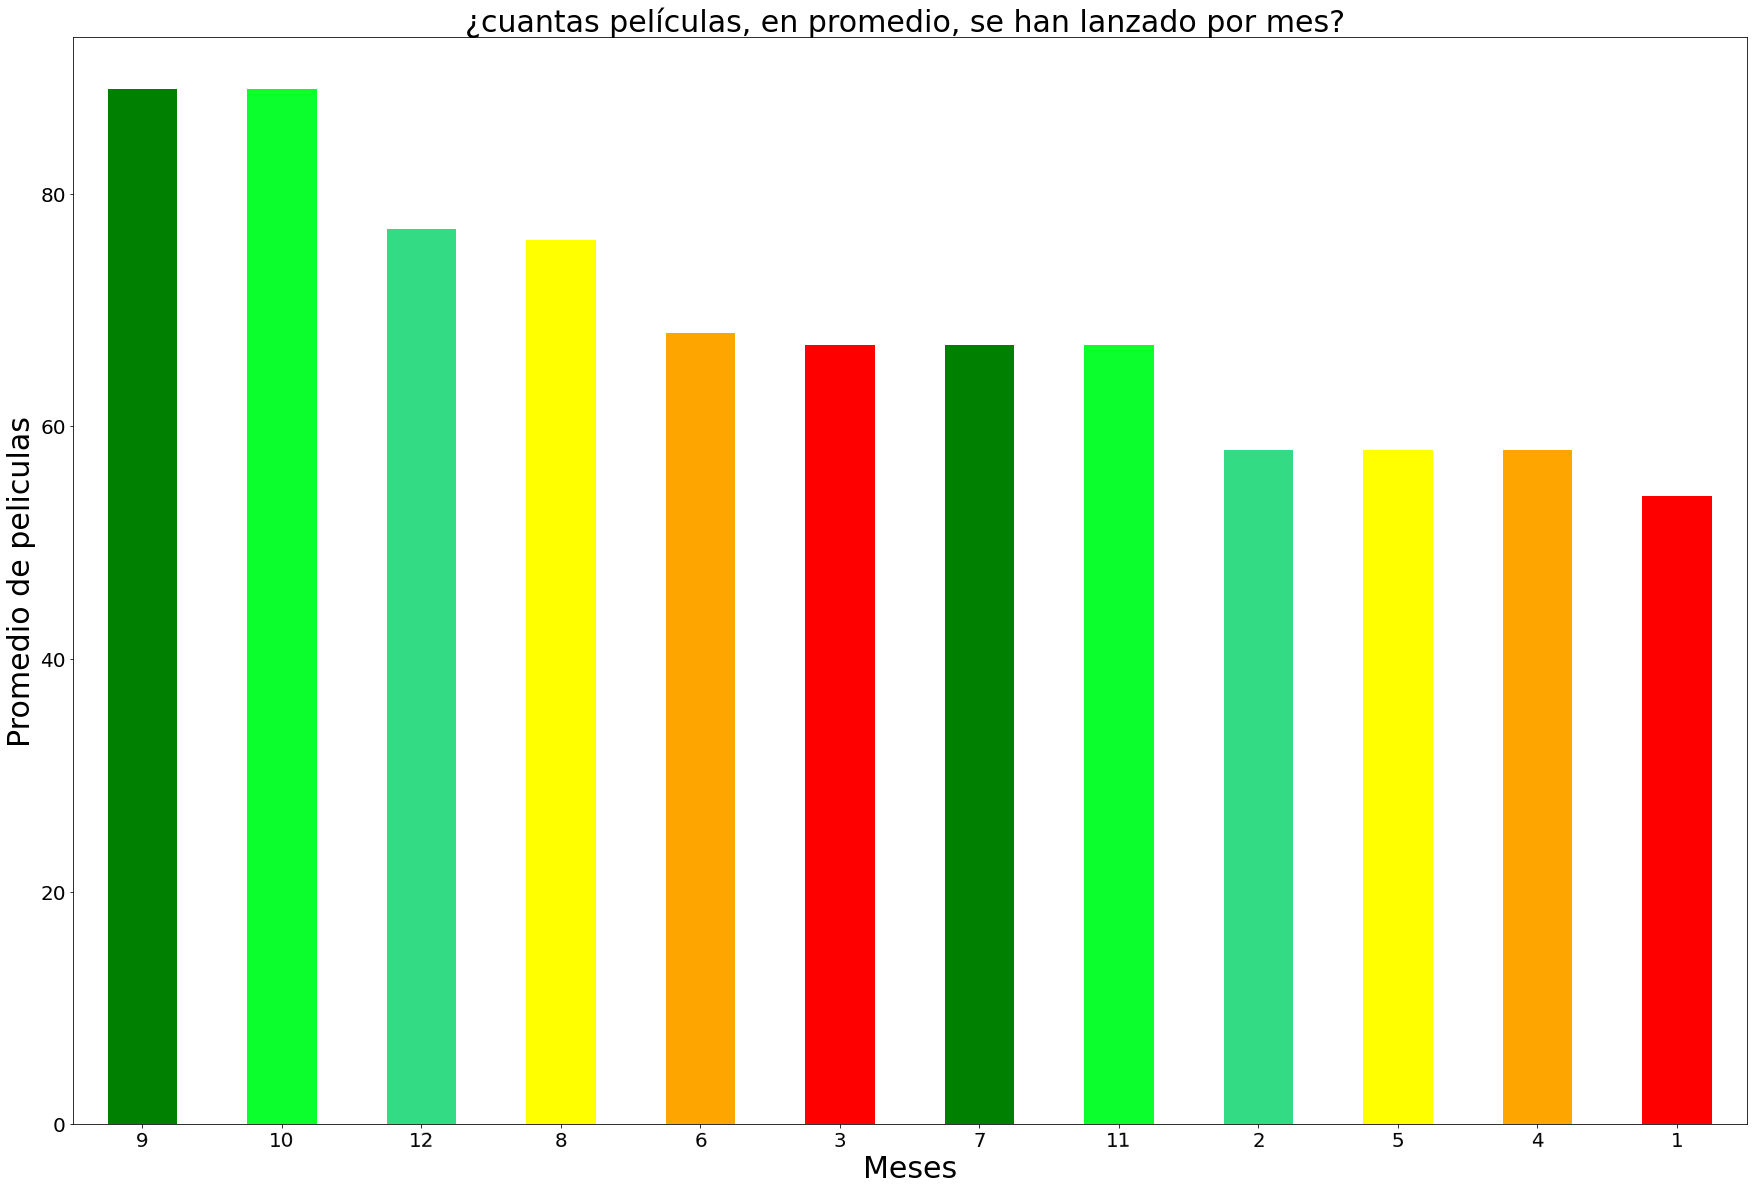

In [45]:
movies_per_month = datos.copy()
movies_per_month['releaseDate'] = pd.DatetimeIndex(movies_per_month['releaseDate']).month
movies_per_month1 = movies_per_month.releaseDate.value_counts().to_frame()
movies_per_month1 = movies_per_month1.div(12)
movies_per_month1['releaseDate'] = movies_per_month1['releaseDate'].apply(np.int64)

fig, ax = plt.subplots(figsize=(30,20)) 
ax = movies_per_month.releaseDate.value_counts().div(12).apply(np.int64).plot.bar(fontsize=20,color=['green','#0AFF2D','#33DB85','yellow','orange','red'],rot=1)
plt.title('¿cuantas películas, en promedio, se han lanzado por mes? ',fontsize=30)
plt.ylabel('Promedio de peliculas',fontsize=30)
plt.xlabel('Meses',fontsize=30)

In [46]:
movies_per_month1.transpose()

,9,10,12,8,6,3,7,11,2,5,4,1
releaseDate,89,89,77,76,68,67,67,67,58,58,58,54


###  3.14 ¿Cómo se correlacionan las calificaciones con el éxito comercial?

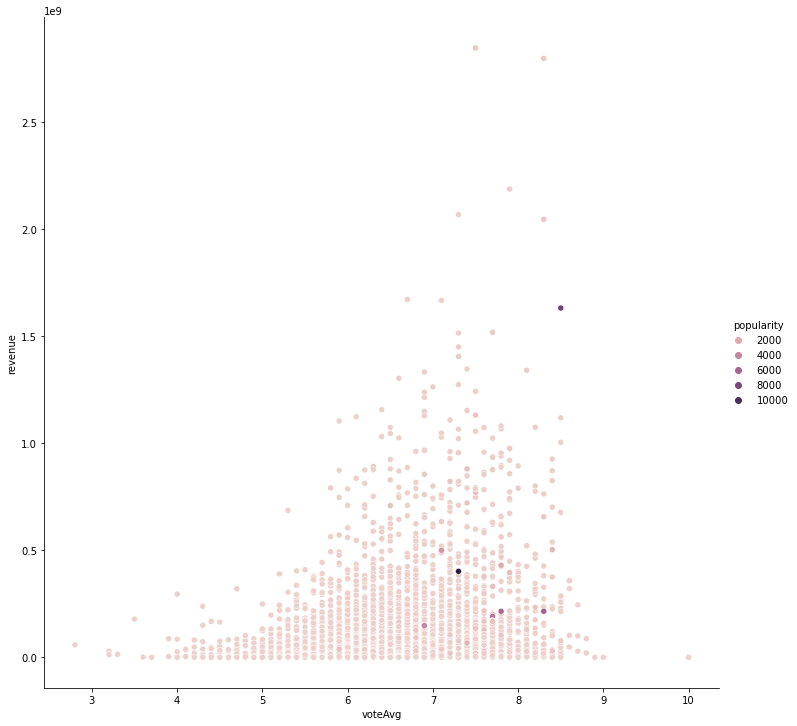

In [47]:
Revunue_Votes = datos.copy()

#drop movies with less revenue than the 0
Revunue_Votes = Revunue_Votes[Revunue_Votes.revenue > 1]
Revunue_Votes = Revunue_Votes[Revunue_Votes.voteAvg > 1]
sns.relplot(data=Revunue_Votes, x="voteAvg", y="revenue",hue="popularity",height=10)
#Revunue_Votes

<AxesSubplot:>

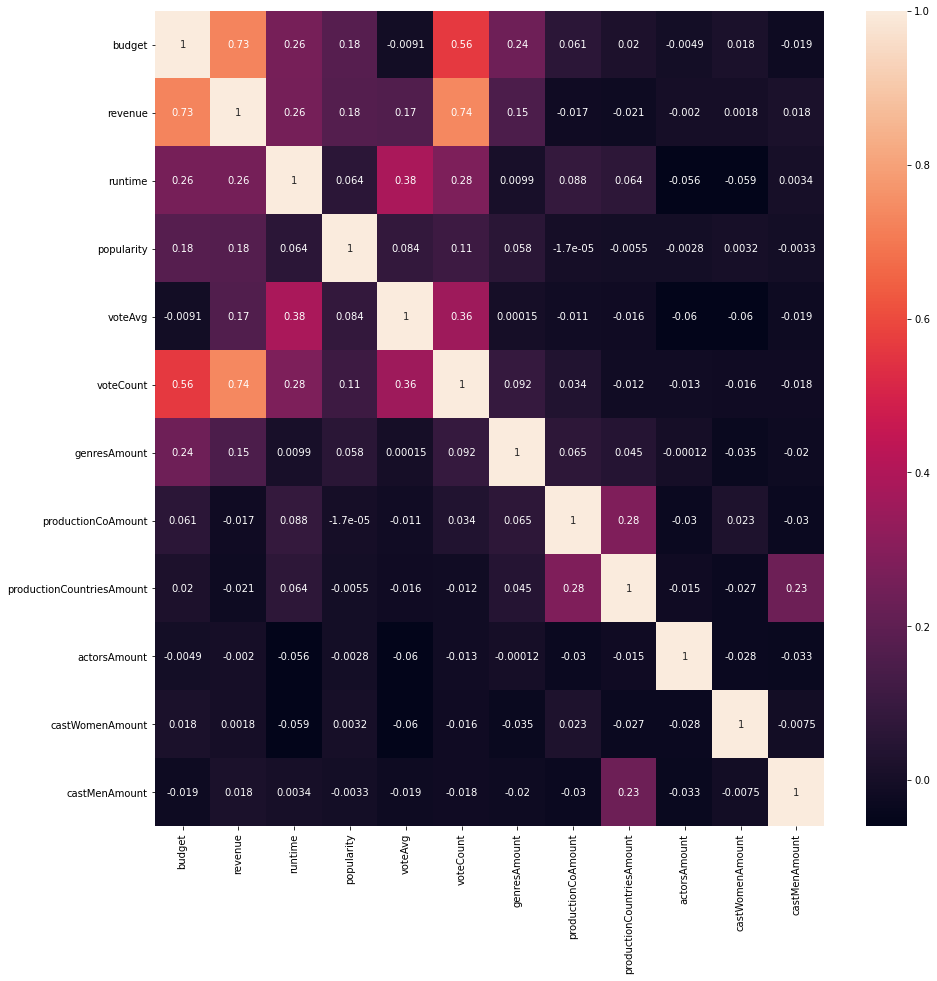

In [48]:
data_corr = Revunue_Votes.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns,annot=True, ax=ax)

###  4.15 ¿A qué género principal pertenecen las películas más largas? 

In [49]:
gender_runtime = datos.copy()
gender_runtime["genero_principal"]=datos.genres.str.split('|').str[0]
gender_runtime=gender_runtime.sort_values(by='runtime', ascending=False).reset_index(drop=True)
gender_runtime[['title','genero_principal','runtime']].head(20)

,title,genero_principal,runtime
0,How Ponyo was Born ~Hayao Miyazaki's Thought P...,Documentary,750
1,Crystal Lake Memories: The Complete History of...,Documentary,400
2,Napoleon,Drama,333
3,1900,Drama,317
4,Cleopatra,Drama,248
5,Kill Bill: The Whole Bloody Affair,Action,247
6,Zack Snyder's Justice League,Action,242
7,Hamlet,Drama,242
8,WWE Wrestlemania 31,Action,240
9,WWE WrestleMania XXX,Action,240


In [50]:
gender_runtime1=gender_runtime.groupby("genero_principal")["runtime"].median().sort_values(ascending=False)
gender_runtime1

genero_principal
History            118.0
War                118.0
Western            114.0
Crime              110.5
Drama              109.0
Adventure          105.0
Music              103.5
Science Fiction    103.0
Action             103.0
Romance            102.0
Fantasy            100.0
Mystery             99.5
Thriller            99.0
Comedy              98.0
Horror              92.0
Documentary         90.0
Family              89.0
TV Movie            85.0
Animation           84.0
Name: runtime, dtype: float64

Text(0.5, 0, 'Genero principal')

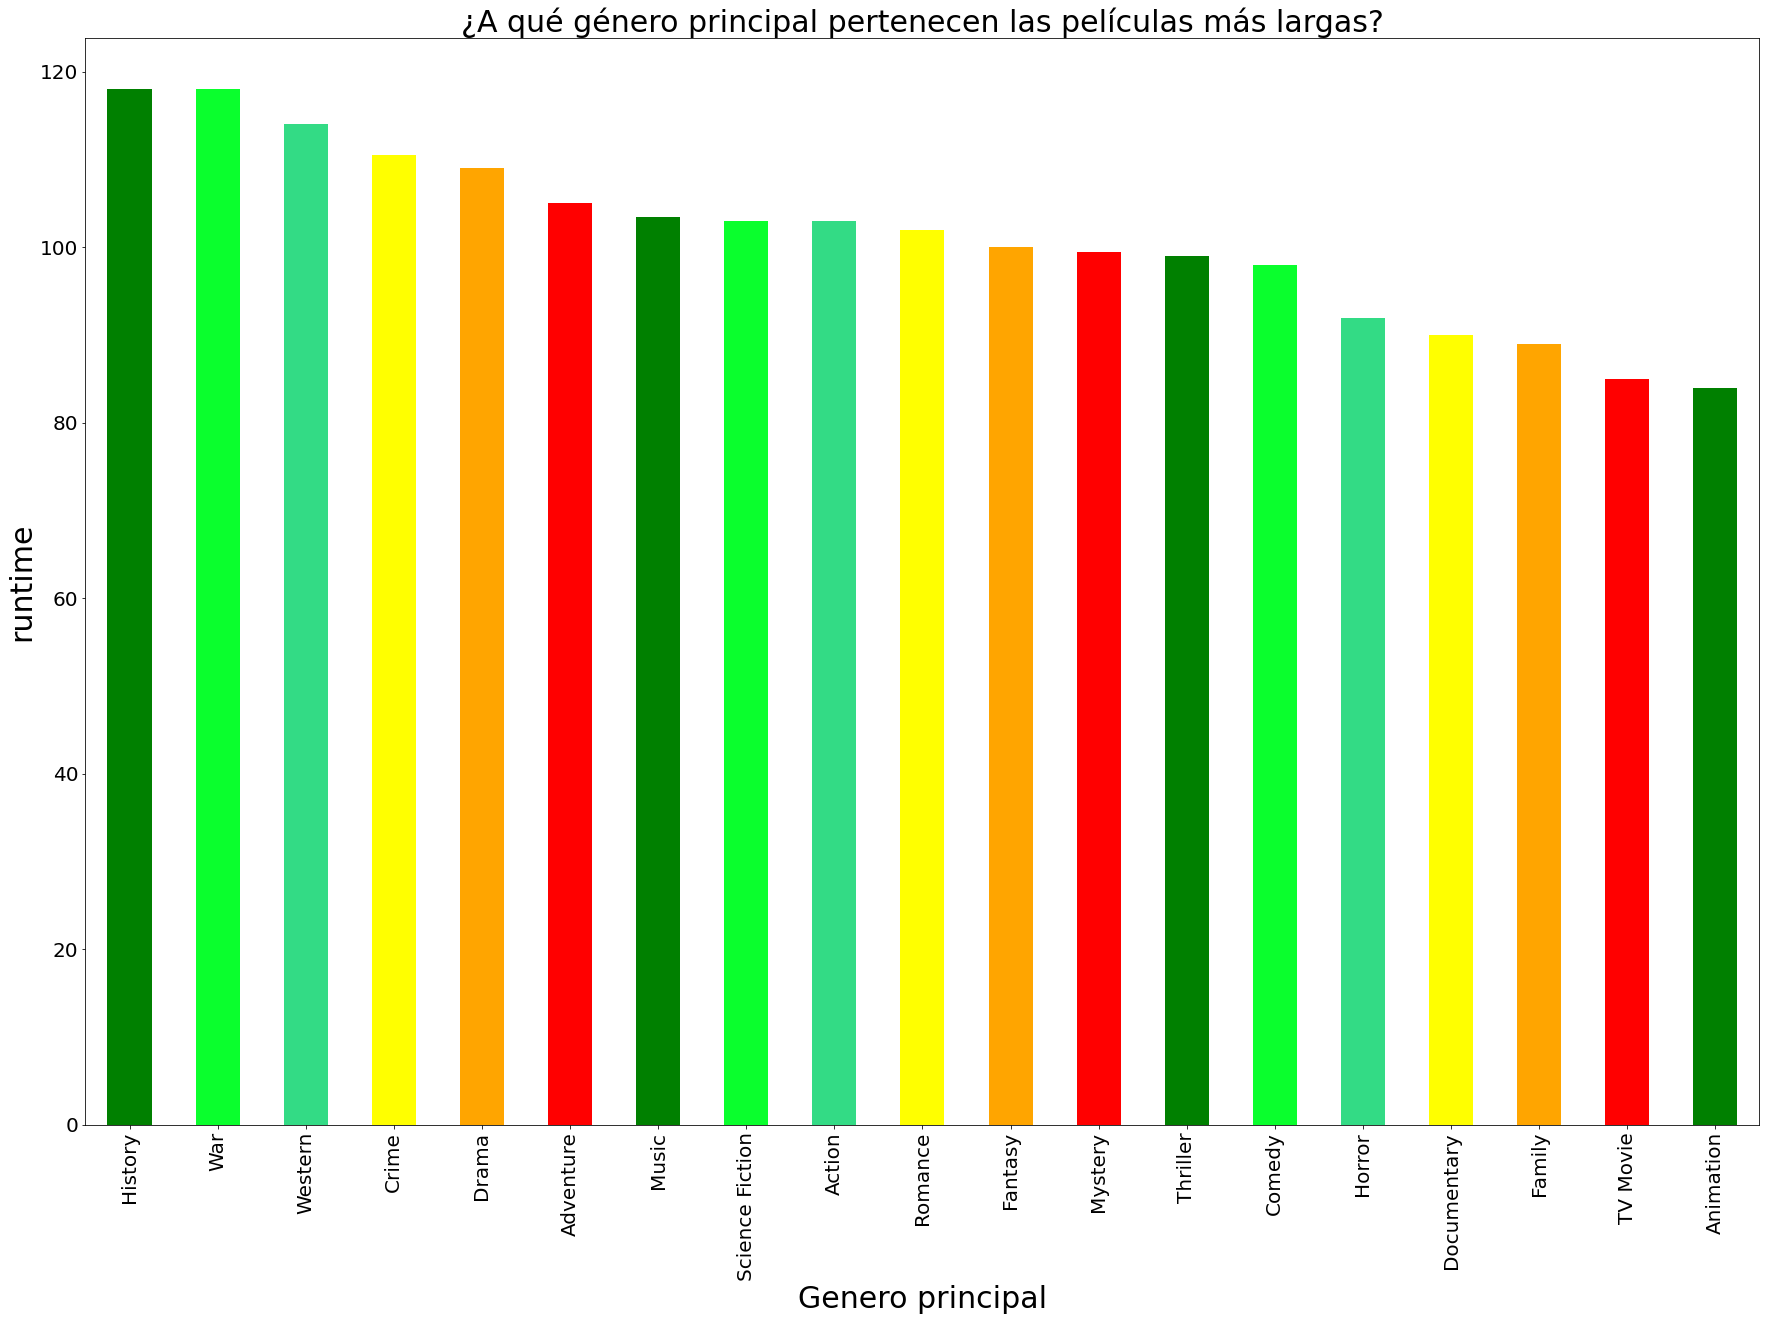

In [51]:
#plot bar 
fig, ax = plt.subplots(figsize=(30,20)) 
ax = gender_runtime1.plot.bar(color=['green','#0AFF2D','#33DB85','yellow','orange','red'],fontsize=20)
plt.title('¿A qué género principal pertenecen las películas más largas?',fontsize=30)
plt.ylabel('runtime',fontsize=30)
plt.xlabel('Genero principal',fontsize=30)

### 5 Genere usted otras seis preguntas que le parezcan interesantes porque le permitan realizar otras exploraciones y respóndalas.

### 5.1 ¿Cuáles son las 15 películas que menos ingresos tuvieron? 

In [54]:
budgetTop = datos.sort_values(by='budget', ascending=True).reset_index(drop=True)
budgetTop = budgetTop.filter(['title','budget'],axis=1)
budgetTop.head(n=15)

,title,budget
0,Boulevard,0
1,Night Hunter,0
2,Sin Nombre,0
3,Tom and Jerry Blast Off to Mars!,0
4,Ocean Waves,0
5,Balto,0
6,Gurren Lagann the Movie: Childhood's End,0
7,Veronica,0
8,Hampstead,0
9,Innocent Voices,0


### 5.2 ¿Pelicula con más cantidad de mujeres en el elenco?

In [57]:
AmoutWomen = datos.sort_values(by='castWomenAmount', ascending=False).reset_index(drop=True)
AmoutWomen = AmoutWomen.filter(['title','castWomenAmount'],axis=1)
AmoutWomen.head(n=1)

,title,castWomenAmount
0,The Witcher: Fireplace,922162.0


### 5.3 ¿muestre las 10 peliculas que tuvieron el elenco más grande?

In [58]:
ActorsV = datos.sort_values(by='actorsAmount', ascending=False).reset_index(drop=True)
ActorsV = ActorsV.filter(['title','actorsAmount'],axis=1)
ActorsV.head(n=10)

,title,actorsAmount
0,Phantastische Harry Potter Momente - Das große...,919590
1,Ben 10 Alien X-tinction,882878
2,El Chavo Del Ocho: Lo Mejor De Don Ramon,853253
3,Yumbina: La droga del sexo,840964
4,Sex Education Films,825491
5,El sexo me da risa 8,815762
6,DRagON BALL P2 2wice dropda bbeet,796822
7,Live Spectacle NARUTO ~Song of the Akatsuki~,784594
8,The Roots of Wolverine: A Conversation with X-...,765207
9,Dangerous Lesson,750209


### 5.4 ¿Quiénes son los directores que hicieron las 25 películas con mayores ganancias?

In [59]:
revenueTop = datos.sort_values(by='revenue', ascending=False).reset_index(drop=True)
revenueTop = revenueTop.filter(['director','revenue'],axis=1)
revenueTop.head(n=25)

,director,revenue
0,James Cameron,2.847246e+09
1,Anthony Russo|Joe Russo,2.797801e+09
2,James Cameron,2.187464e+09
3,J.J. Abrams,2.068224e+09
4,Anthony Russo|Joe Russo,2.046240e+09
5,Colin Trevorrow,1.671713e+09
6,Jon Favreau,1.667635e+09
7,Jon Watts,1.631853e+09
8,Joss Whedon,1.518816e+09
9,James Wan,1.515048e+09


### 5.5 ¿Cuales fueron las 5 peliculas que tuvo mayor cantidad de compañias productoras participando en ella?

In [71]:
revenueTop = datos.sort_values(by='revenue', ascending=False).reset_index(drop=True)
revenueTop = revenueTop.filter(['title','productionCoAmount'],axis=1)
revenueTop.head()

,title,productionCoAmount
0,Avatar,4
1,Avengers: Endgame,1
2,Titanic,3
3,Star Wars: The Force Awakens,2
4,Avengers: Infinity War,1
